Estimado candidato,

Estamos encantados de que estés considerando unirte a nuestro equipo de ciencia de datos. Como parte de nuestro proceso de evaluación, te pedimos que completes la siguiente prueba técnica.

**Descripción de la tarea:**

Se te proporciona un conjunto de datos anónimos que consta de varias columnas nombradas como 'col1', 'col2', 'col3', etc., hasta 'col20', y una columna 'target' que representa la variable objetivo. Tu tarea es realizar un análisis exploratorio de datos (EDA) y construir un modelo de aprendizaje automático para predecir la variable 'target'.

**Detalles de la tarea:**

1. **Análisis exploratorio de datos (EDA):** Realiza un análisis exploratorio detallado de los datos. Esto debe incluir, pero no está limitado a:
   - Estadísticas descriptivas de las variables (mínimo, máximo, media, mediana, desviación estándar, etc.).
   - Verificación de valores perdidos o anómalos.
   - Análisis de correlación entre las variables.
   - Visualizaciones para entender mejor las distribuciones y relaciones de los datos.

2. **Preprocesamiento de datos:** Prepárate para realizar cualquier limpieza o transformación necesaria de los datos basándote en tu EDA.

3. **Creación de un modelo de línea base (Baseline):** Entrena varios modelos de aprendizaje automático para predecir la variable 'target'. Comienza con modelos sencillos como la regresión logística y avanza hacia modelos más complejos como los árboles de decisión, random forest, SVM, XGBoost, etc.

4. **Evaluación del modelo:** Evalúa el rendimiento de cada modelo utilizando métricas apropiadas. Por ejemplo, si 'target' es una variable binaria, podrías considerar la precisión, la sensibilidad, la especificidad, el AUC-ROC, etc.

5. **Selección del modelo:** Selecciona el modelo que creas que funciona mejor. Justifica tu elección basándote en las métricas de evaluación y cualquier otra consideración pertinente.

6. **Predicción:** Usa tu modelo seleccionado para hacer predicciones en el conjunto de datos.

**Entregables:**

Por favor, proporciona el código que hayas utilizado para completar esta tarea, junto con un informe detallado que explique tu enfoque y los resultados. El informe debe estar bien estructurado y ser fácil de seguir, permitiendo a los evaluadores entender tu proceso de pensamiento y las decisiones que hayas tomado.

¡Buena suerte y esperamos ver tu solución!

## Carga de datos

In [264]:
import pandas as pd
import traceback
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_percentage_error # regresion
from sklearn.metrics import balanced_accuracy_score #Clasficación
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score


#Clasificacion
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, \
accuracy_score, f1_score, precision_score, recall_score, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN

In [265]:
train = pd.read_csv("data/train.csv")

In [266]:
train

,ID,col1,col2,col3,col4,col5,col6,col7,col8,col9,...,col12,col13,col14,col15,col16,col17,col18,col19,col20,target
0,4995,0.02,26.80,0.09,1.35,0.060,0.09,0.09,1.97,1.48,...,0.031,9.52,0.84,0.001,1.24,0.96,0.09,0.08,0.08,0
1,1709,1.13,3.95,0.32,3.95,0.030,4.66,0.56,1.89,1.36,...,0.170,13.83,1.15,0.006,10.55,3.76,0.02,0.45,0.06,0
2,7825,0.07,8.05,0.04,0.14,0.040,0.06,0.06,0.05,0.00,...,0.120,2.61,1.52,0.008,4.13,0.27,0.03,0.03,0.01,0
3,6918,0.09,26.40,0.03,0.92,0.090,0.57,0.00,0.36,0.03,...,0.055,5.22,1.96,0.000,11.32,0.25,0.09,0.01,0.05,0
4,5,0.94,14.47,0.03,2.88,0.003,0.80,0.43,1.38,0.11,...,0.135,9.75,1.89,0.006,27.17,5.42,0.08,0.19,0.02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5592,3048,0.01,8.92,0.20,4.88,0.050,0.36,0.09,0.54,0.14,...,0.069,8.60,1.90,0.007,17.18,2.91,0.08,0.43,0.09,0
5593,2130,0.09,1.36,0.04,3.45,0.003,3.42,0.03,1.39,1.12,...,0.108,9.36,1.58,0.009,42.15,4.39,0.02,0.11,0.07,0
5594,5005,0.10,4.95,0.01,0.25,0.040,0.09,0.10,1.88,0.33,...,0.021,18.78,0.62,0.007,5.97,0.32,0.10,0.10,0.08,0
5595,2125,0.05,23.18,0.04,3.65,0.001,4.43,0.63,1.94,1.27,...,0.194,13.32,1.93,0.005,23.84,4.80,0.08,0.22,0.07,0


## Primer análisis

In [267]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5597 entries, 0 to 5596
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      5597 non-null   int64  
 1   col1    5597 non-null   float64
 2   col2    5597 non-null   float64
 3   col3    5597 non-null   float64
 4   col4    5597 non-null   float64
 5   col5    5597 non-null   float64
 6   col6    5597 non-null   float64
 7   col7    5597 non-null   float64
 8   col8    5597 non-null   float64
 9   col9    5597 non-null   float64
 10  col10   5597 non-null   float64
 11  col11   5597 non-null   float64
 12  col12   5597 non-null   float64
 13  col13   5597 non-null   float64
 14  col14   5597 non-null   float64
 15  col15   5597 non-null   float64
 16  col16   5597 non-null   float64
 17  col17   5597 non-null   float64
 18  col18   5597 non-null   float64
 19  col19   5597 non-null   float64
 20  col20   5597 non-null   float64
 21  target  5597 non-null   int64  
dtype

In [268]:
for i in train.columns:
    print(f"columna: {i} - {train[i].mean()}")

columna: ID - 3962.9099517598715
columna: col1 - 0.6747972127925674
columna: col2 - 14.438840450241202
columna: col3 - 0.16360282294086118
columna: col4 - 1.5797016258710024
columna: col5 - 0.042747364659639096
columna: col6 - 2.2130927282472754
columna: col7 - 0.25088976237269967
columna: col8 - 0.8076541004109346
columna: col9 - 0.7660568161515099
columna: col10 - 0.3243094514918706
columna: col11 - 0.32969287118098983
columna: col12 - 0.10005020546721458
columna: col13 - 9.81926746471324
columna: col14 - 1.3318795783455422
columna: col15 - 0.005194389851706271
columna: col16 - 16.621248883330356
columna: col17 - 2.9318956583884224
columna: col18 - 0.04960157227085939
columna: col19 - 0.14985527961407896
columna: col20 - 0.044999106664284444
columna: target - 0.11434697159192425


In [269]:
def cardinalidad(data):
    '''Funcion para saber la cardinalidad de las varibales que tenemos en el data frame'''
    df_cardin = pd.DataFrame([{
                'variable' : i,
                'tipo_dato' : data[i].dtypes,
                'cantidad_de_nulos' : data[i].isna().sum(),
                'valores_unicos' : data[i].unique(),
                'cardinalidad' : data[i].nunique(),
                'porcentaje_cardinalidad' : (data[i].nunique()/data.shape[0])*100
            } for i in data])
    return df_cardin

In [270]:
cardinalidad(train)

,variable,tipo_dato,cantidad_de_nulos,valores_unicos,cardinalidad,porcentaje_cardinalidad
0,ID,int64,0,"[4995, 1709, 7825, 6918, 5, 1477, 5788, 5006, ...",5597,100.000000
1,col1,float64,0,"[0.02, 1.13, 0.07, 0.09, 0.94, 0.2, 0.05, 0.04...",479,8.558156
2,col2,float64,0,"[26.8, 3.95, 8.05, 26.4, 14.47, 1.28, 0.2, 19....",2320,41.450777
3,col3,float64,0,"[0.09, 0.32, 0.04, 0.03, 0.74, 0.01, 0.05, 0.0...",107,1.911738
4,col4,float64,0,"[1.35, 3.95, 0.14, 0.92, 2.88, 3.59, 0.08, 0.2...",470,8.397356
5,col5,float64,0,"[0.06, 0.03, 0.04, 0.09, 0.003, 0.0, 0.001, 0....",23,0.410934
6,col6,float64,0,"[0.09, 4.66, 0.06, 0.57, 0.8, 2.76, 0.02, 0.04...",784,14.007504
7,col7,float64,0,"[0.09, 0.56, 0.06, 0.0, 0.43, 0.39, 0.1, 0.02,...",91,1.625871
8,col8,float64,0,"[1.97, 1.89, 0.05, 0.36, 1.38, 1.26, 0.33, 1.8...",201,3.591210
9,col9,float64,0,"[1.48, 1.36, 0.0, 0.03, 0.11, 0.13, 0.74, 0.86...",151,2.697874


## Análisis gráfico de las variables

In [271]:
def graficos_variables_cuant(data):
    ''''Funcuion para graficar las variables cuantitativas'''
    media_color = 'r'
    mediana_color = 'b'
    try:
        for columna in data.columns:
            print('--'*30)
            print(f"VARIABLE: {columna}\n")

            media = data[columna].mean()
            mediana = data[columna].median()

            plt.figure(figsize=(20,4))
            sns.boxplot(data[columna], orient='h', palette='husl')
            plt.axvline(media, color = media_color, linestyle = 'dashed', linewidth = 1)
            plt.axvline(mediana, color = mediana_color, linestyle = 'dashed', linewidth = 1)

            plt.show()

            sns.displot(data[columna], rug = True, palette='husl' , bins = 30)
            plt.axvline(media, color = media_color, linestyle = 'dashed', linewidth = 1, label = f'Media: {media:.0f}')
            plt.axvline(mediana, color = mediana_color, linestyle = 'dashed', linewidth = 1, label = f'Mediana: {mediana:.0f}')

            plt.title(f'Distribución de {columna}')
            plt.legend()

            plt.show()

            print(data[columna].describe().round())
            print('--'*30)
    except Exception as a:
        print(f"No puedo analizar la variable por este error {a}")

------------------------------------------------------------
VARIABLE: ID



C:\Users\Mega Tecnologia\AppData\Local\Temp\ipykernel_20196\229618433.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data[columna], orient='h', palette='husl')


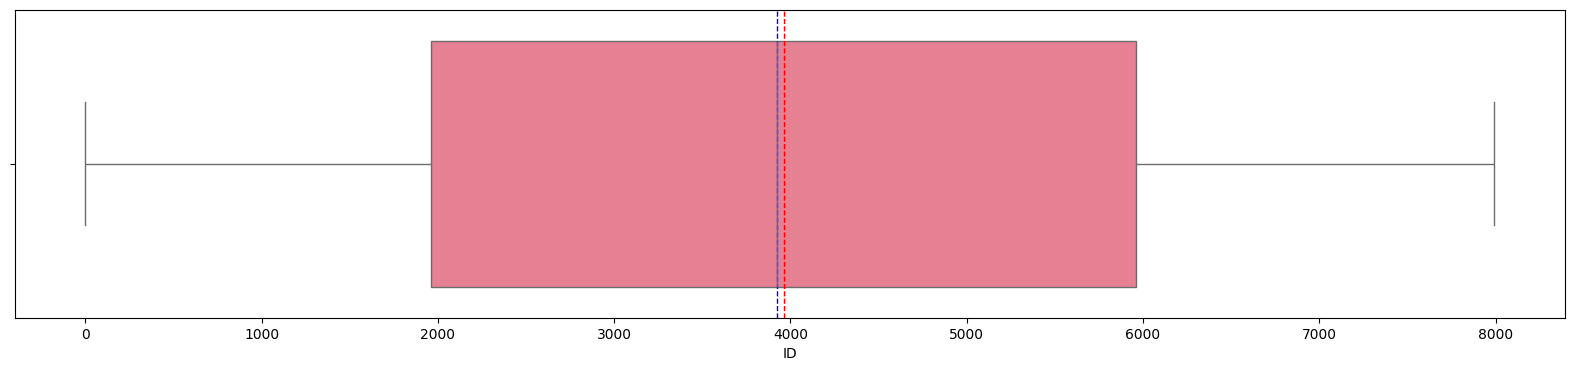

C:\Users\Mega Tecnologia\AppData\Local\Temp\ipykernel_20196\229618433.py:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(data[columna], rug = True, palette='husl' , bins = 30)


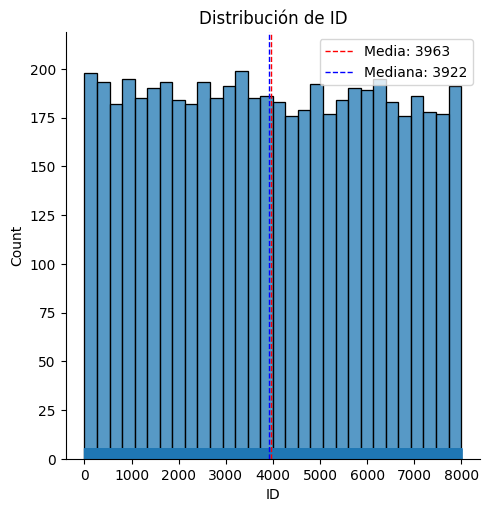

count    5597.0
mean     3963.0
std      2311.0
min         0.0
25%      1963.0
50%      3922.0
75%      5960.0
max      7993.0
Name: ID, dtype: float64
------------------------------------------------------------
------------------------------------------------------------
VARIABLE: col1



C:\Users\Mega Tecnologia\AppData\Local\Temp\ipykernel_20196\229618433.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data[columna], orient='h', palette='husl')


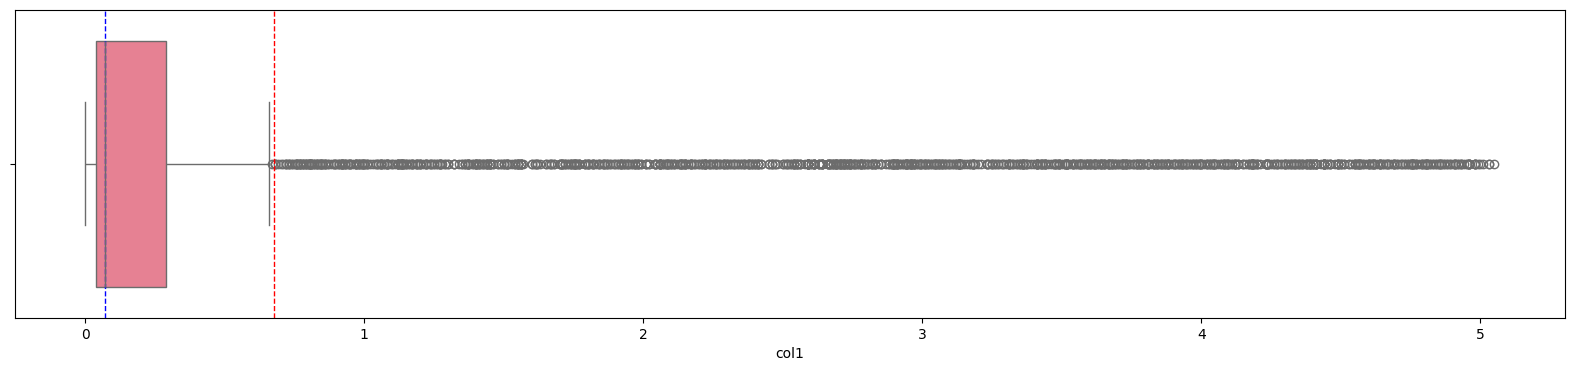

C:\Users\Mega Tecnologia\AppData\Local\Temp\ipykernel_20196\229618433.py:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(data[columna], rug = True, palette='husl' , bins = 30)


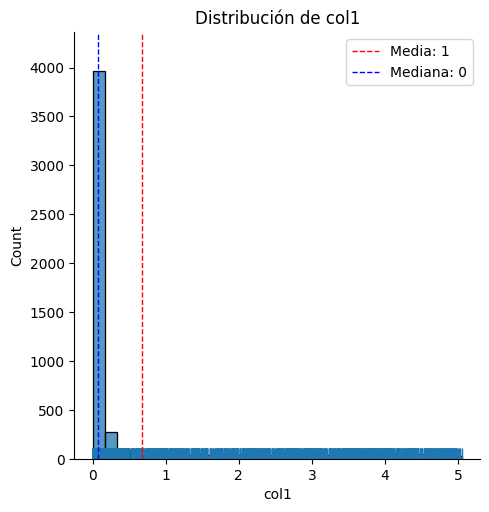

count    5597.0
mean        1.0
std         1.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         5.0
Name: col1, dtype: float64
------------------------------------------------------------
------------------------------------------------------------
VARIABLE: col2



C:\Users\Mega Tecnologia\AppData\Local\Temp\ipykernel_20196\229618433.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data[columna], orient='h', palette='husl')


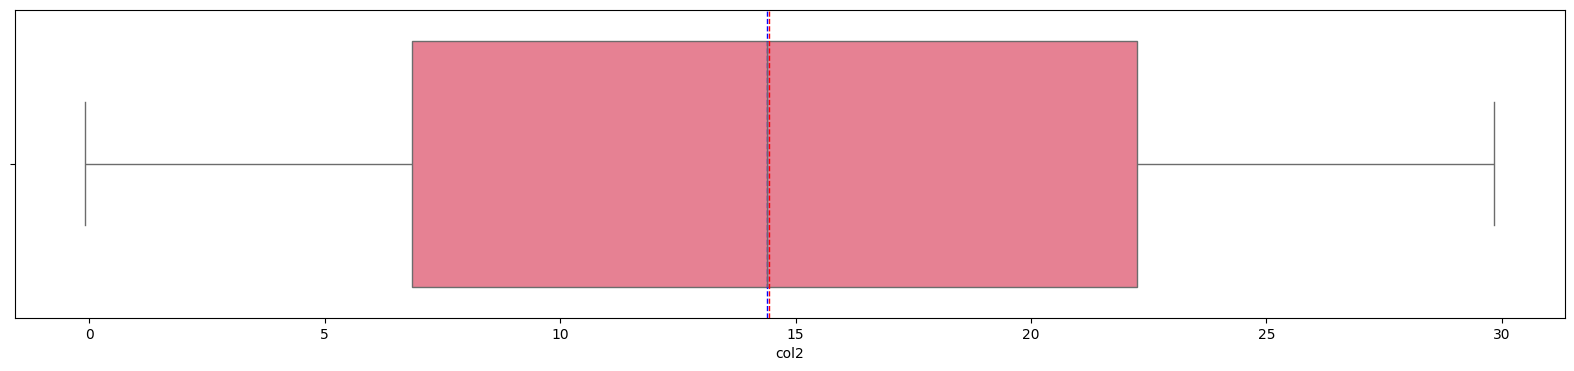

C:\Users\Mega Tecnologia\AppData\Local\Temp\ipykernel_20196\229618433.py:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(data[columna], rug = True, palette='husl' , bins = 30)


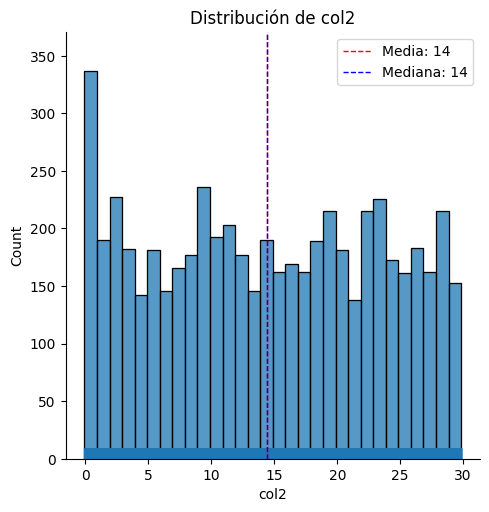

count    5597.0
mean       14.0
std         9.0
min        -0.0
25%         7.0
50%        14.0
75%        22.0
max        30.0
Name: col2, dtype: float64
------------------------------------------------------------
------------------------------------------------------------
VARIABLE: col3



C:\Users\Mega Tecnologia\AppData\Local\Temp\ipykernel_20196\229618433.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data[columna], orient='h', palette='husl')


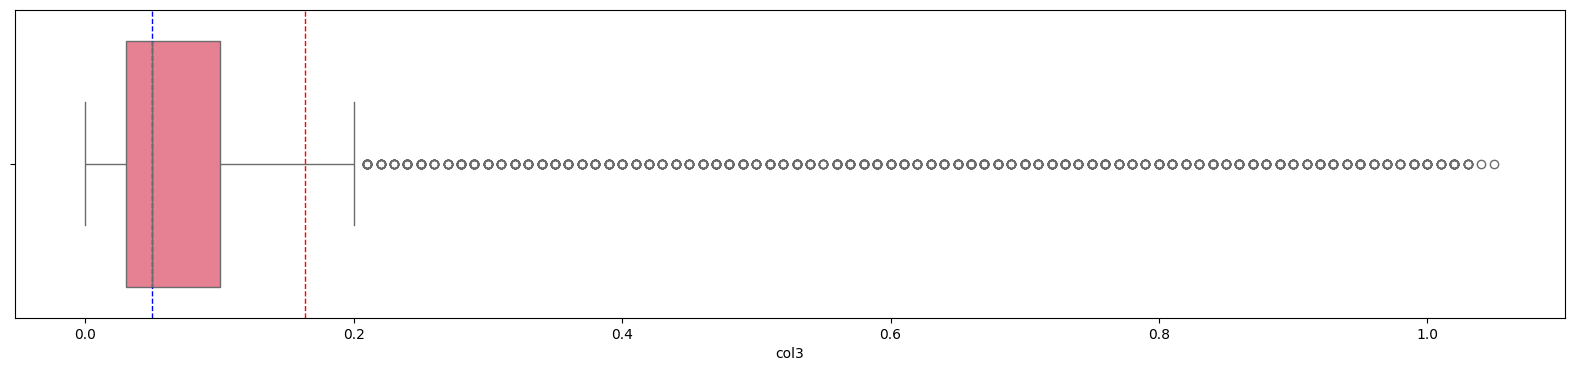

C:\Users\Mega Tecnologia\AppData\Local\Temp\ipykernel_20196\229618433.py:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(data[columna], rug = True, palette='husl' , bins = 30)


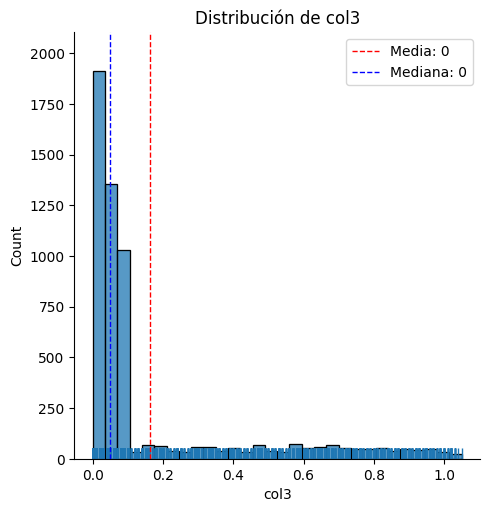

count    5597.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         1.0
Name: col3, dtype: float64
------------------------------------------------------------
------------------------------------------------------------
VARIABLE: col4



C:\Users\Mega Tecnologia\AppData\Local\Temp\ipykernel_20196\229618433.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data[columna], orient='h', palette='husl')


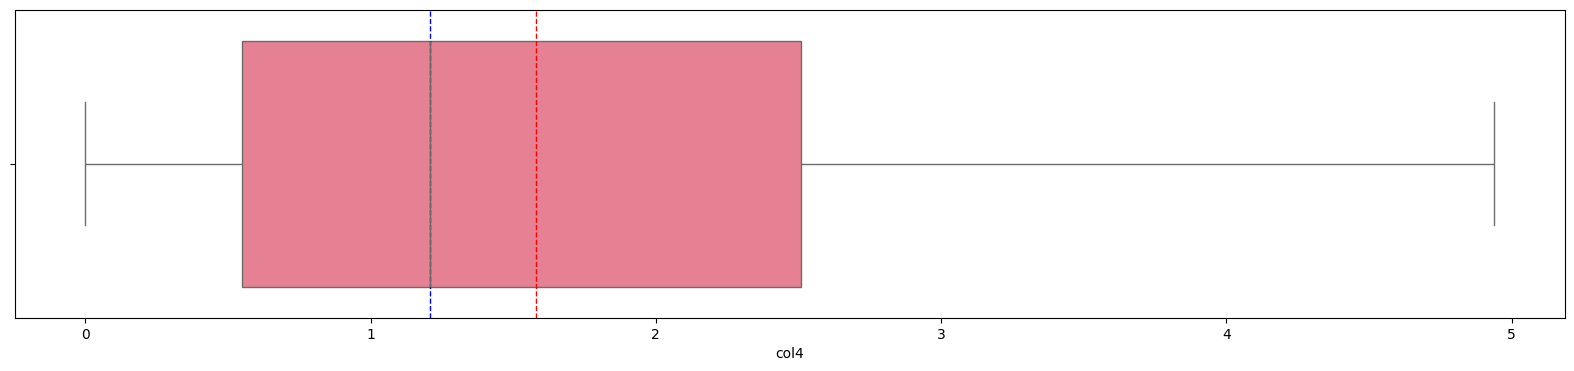

C:\Users\Mega Tecnologia\AppData\Local\Temp\ipykernel_20196\229618433.py:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(data[columna], rug = True, palette='husl' , bins = 30)


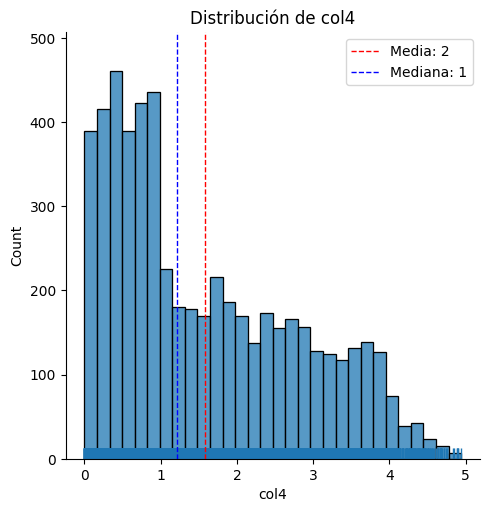

count    5597.0
mean        2.0
std         1.0
min         0.0
25%         1.0
50%         1.0
75%         3.0
max         5.0
Name: col4, dtype: float64
------------------------------------------------------------
------------------------------------------------------------
VARIABLE: col5



C:\Users\Mega Tecnologia\AppData\Local\Temp\ipykernel_20196\229618433.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data[columna], orient='h', palette='husl')


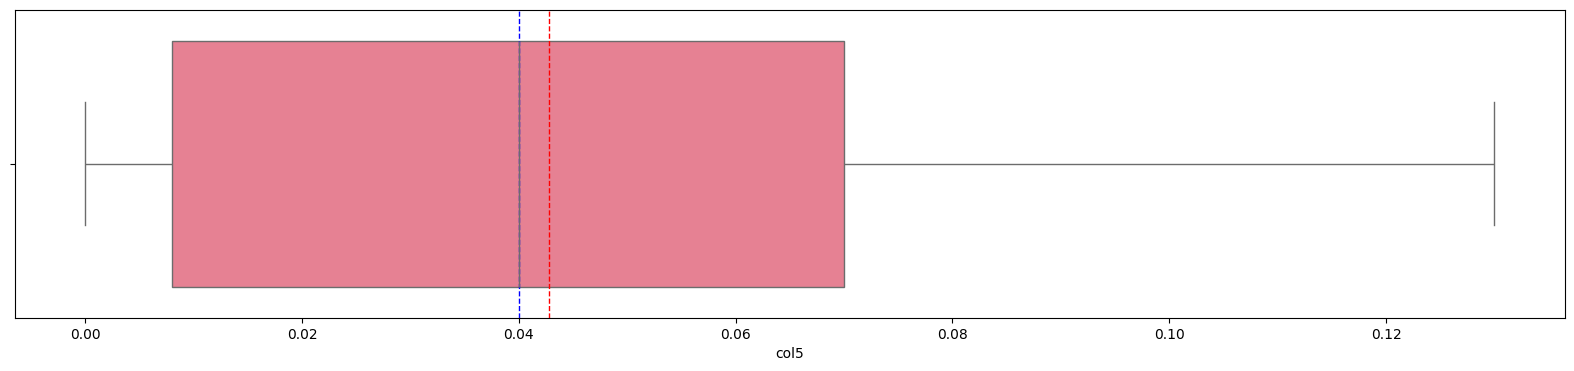

C:\Users\Mega Tecnologia\AppData\Local\Temp\ipykernel_20196\229618433.py:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(data[columna], rug = True, palette='husl' , bins = 30)


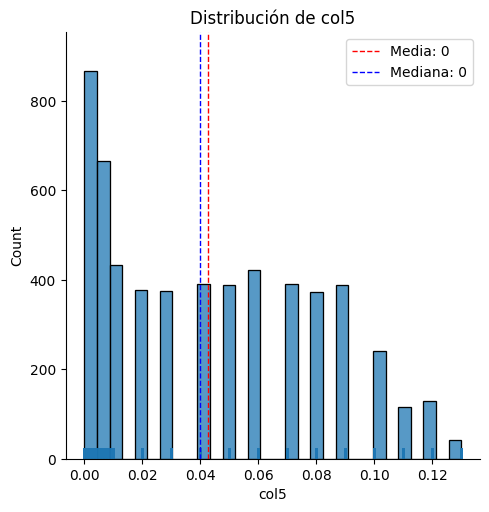

count    5597.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: col5, dtype: float64
------------------------------------------------------------
------------------------------------------------------------
VARIABLE: col6



C:\Users\Mega Tecnologia\AppData\Local\Temp\ipykernel_20196\229618433.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data[columna], orient='h', palette='husl')


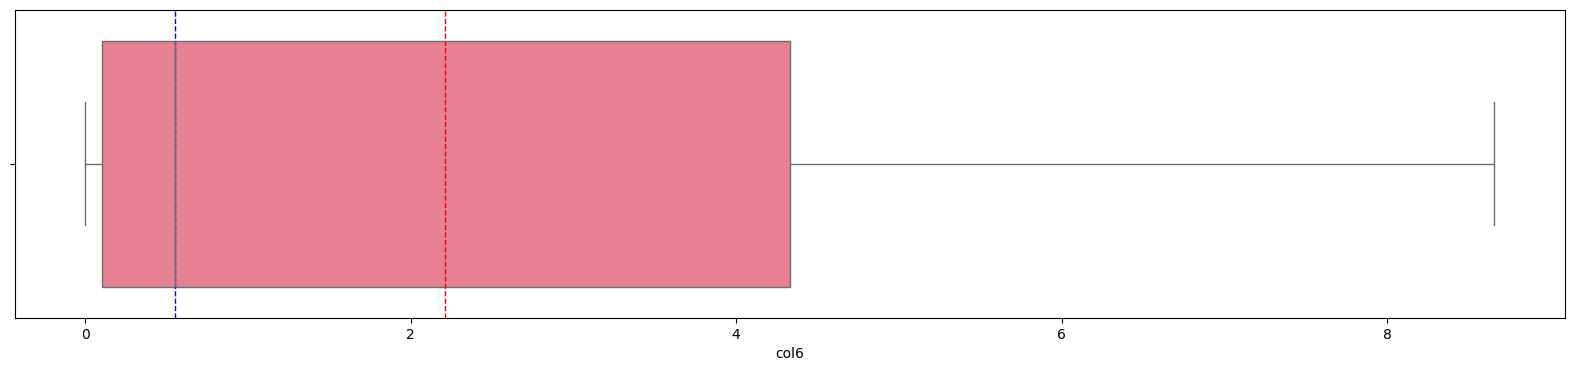

C:\Users\Mega Tecnologia\AppData\Local\Temp\ipykernel_20196\229618433.py:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(data[columna], rug = True, palette='husl' , bins = 30)


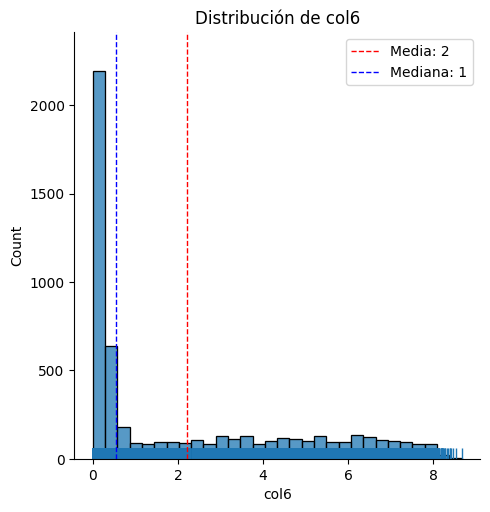

count    5597.0
mean        2.0
std         3.0
min         0.0
25%         0.0
50%         1.0
75%         4.0
max         9.0
Name: col6, dtype: float64
------------------------------------------------------------
------------------------------------------------------------
VARIABLE: col7



C:\Users\Mega Tecnologia\AppData\Local\Temp\ipykernel_20196\229618433.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data[columna], orient='h', palette='husl')


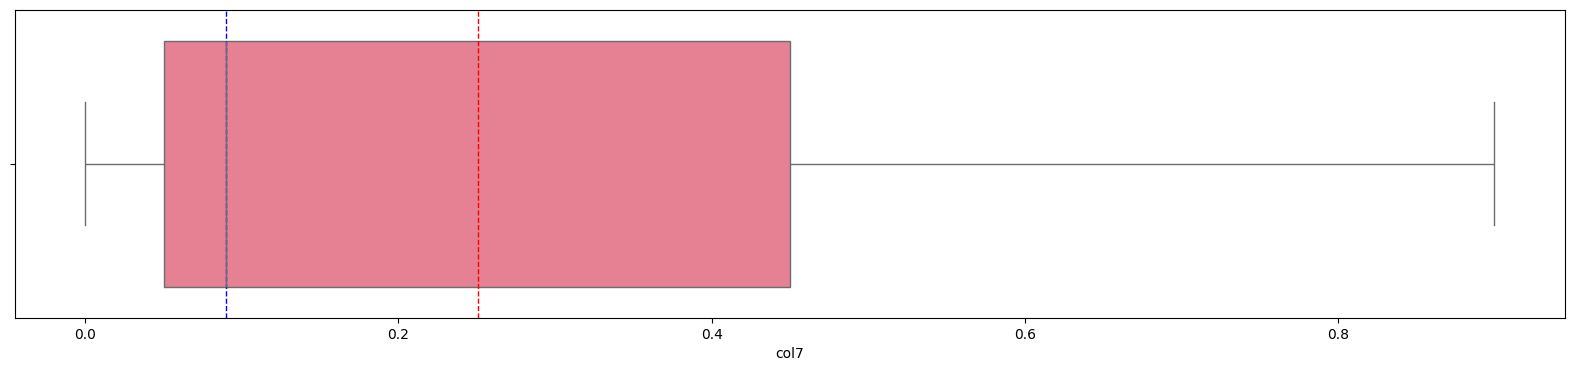

C:\Users\Mega Tecnologia\AppData\Local\Temp\ipykernel_20196\229618433.py:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(data[columna], rug = True, palette='husl' , bins = 30)


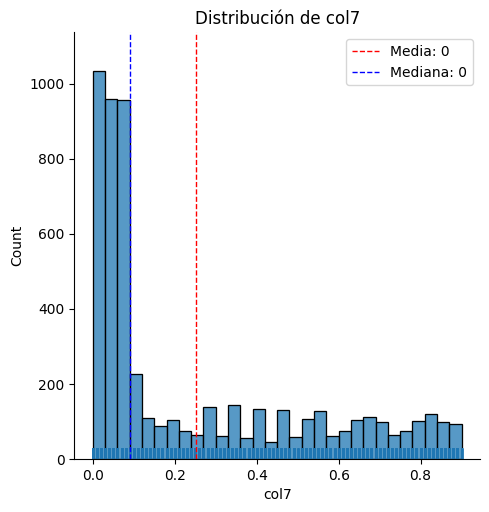

count    5597.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         1.0
Name: col7, dtype: float64
------------------------------------------------------------
------------------------------------------------------------
VARIABLE: col8



C:\Users\Mega Tecnologia\AppData\Local\Temp\ipykernel_20196\229618433.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data[columna], orient='h', palette='husl')


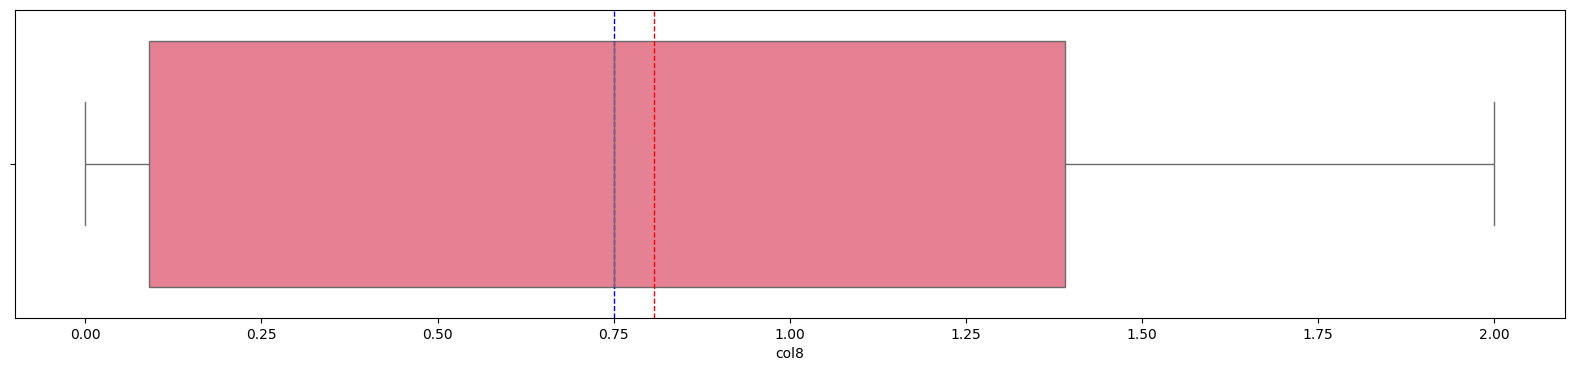

C:\Users\Mega Tecnologia\AppData\Local\Temp\ipykernel_20196\229618433.py:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(data[columna], rug = True, palette='husl' , bins = 30)


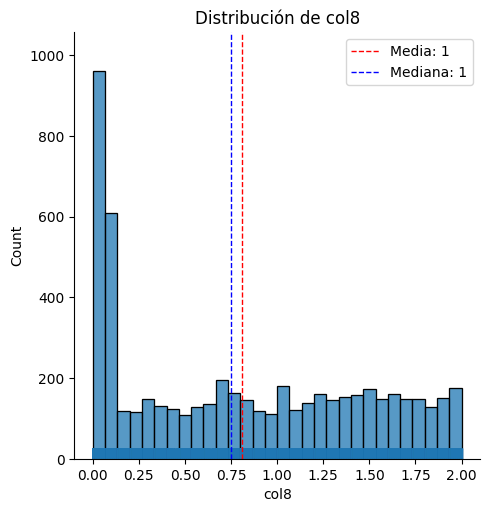

count    5597.0
mean        1.0
std         1.0
min         0.0
25%         0.0
50%         1.0
75%         1.0
max         2.0
Name: col8, dtype: float64
------------------------------------------------------------
------------------------------------------------------------
VARIABLE: col9



C:\Users\Mega Tecnologia\AppData\Local\Temp\ipykernel_20196\229618433.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data[columna], orient='h', palette='husl')


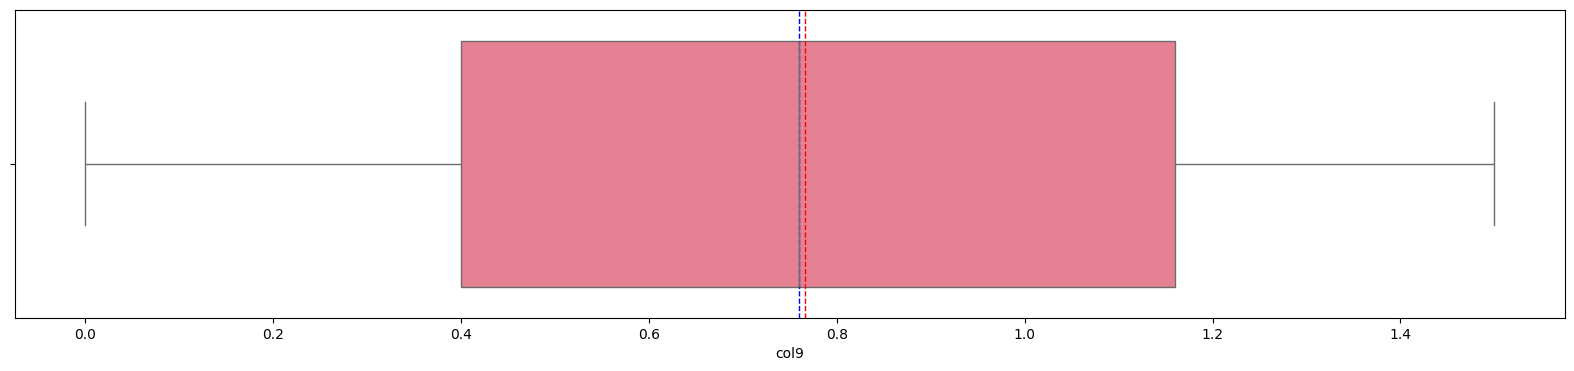

C:\Users\Mega Tecnologia\AppData\Local\Temp\ipykernel_20196\229618433.py:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(data[columna], rug = True, palette='husl' , bins = 30)


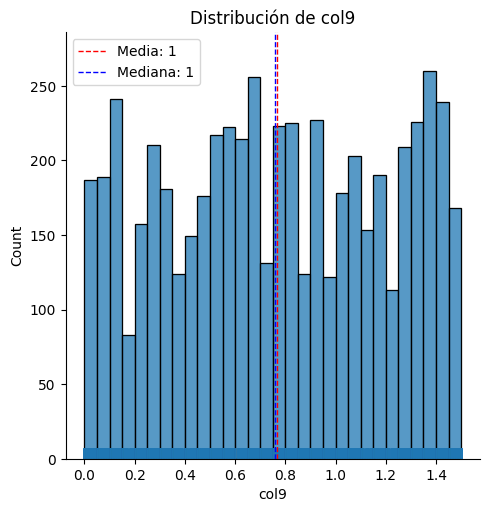

count    5597.0
mean        1.0
std         0.0
min         0.0
25%         0.0
50%         1.0
75%         1.0
max         2.0
Name: col9, dtype: float64
------------------------------------------------------------
------------------------------------------------------------
VARIABLE: col10



C:\Users\Mega Tecnologia\AppData\Local\Temp\ipykernel_20196\229618433.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data[columna], orient='h', palette='husl')


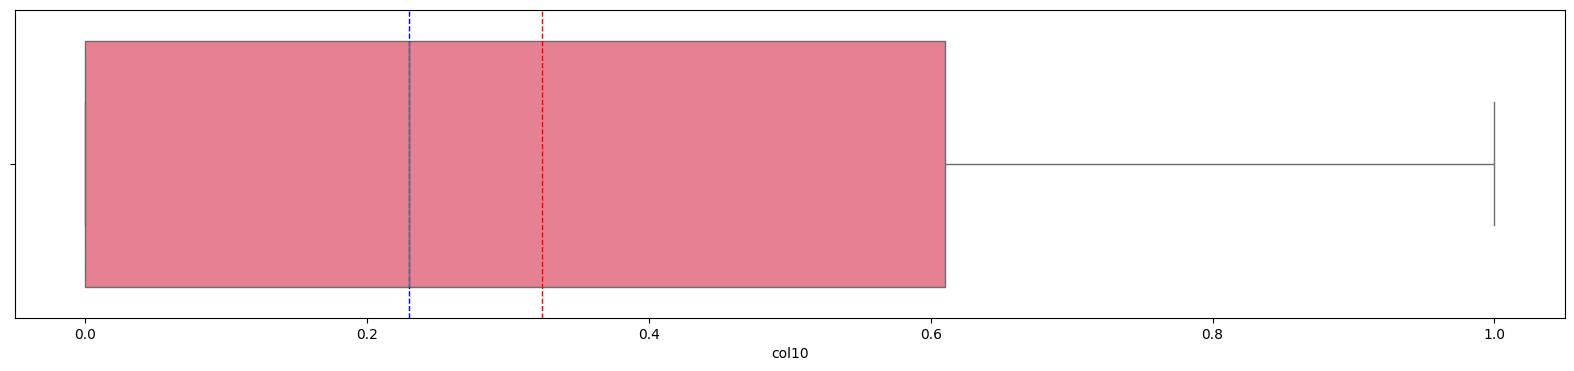

C:\Users\Mega Tecnologia\AppData\Local\Temp\ipykernel_20196\229618433.py:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(data[columna], rug = True, palette='husl' , bins = 30)


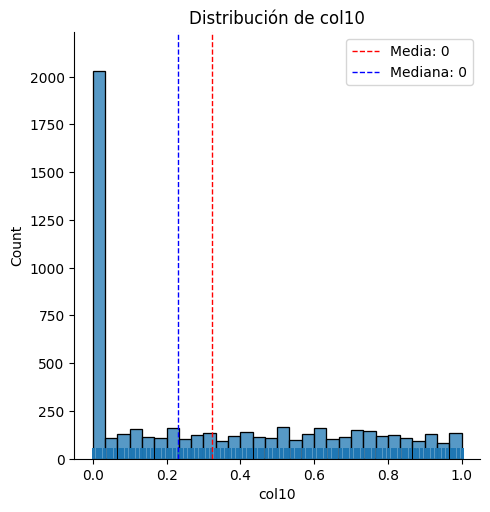

count    5597.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         1.0
max         1.0
Name: col10, dtype: float64
------------------------------------------------------------
------------------------------------------------------------
VARIABLE: col11



C:\Users\Mega Tecnologia\AppData\Local\Temp\ipykernel_20196\229618433.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data[columna], orient='h', palette='husl')


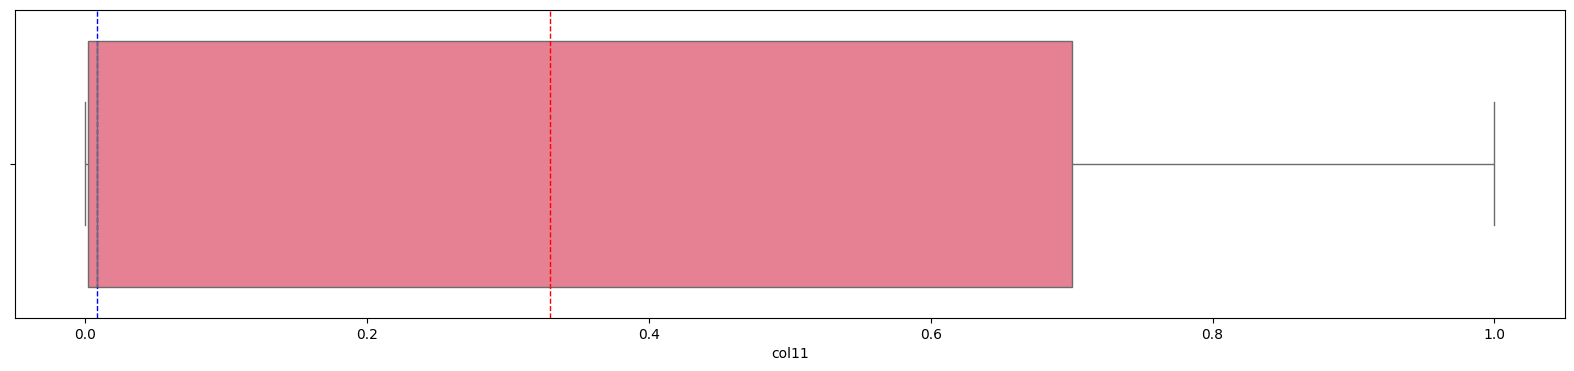

C:\Users\Mega Tecnologia\AppData\Local\Temp\ipykernel_20196\229618433.py:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(data[columna], rug = True, palette='husl' , bins = 30)


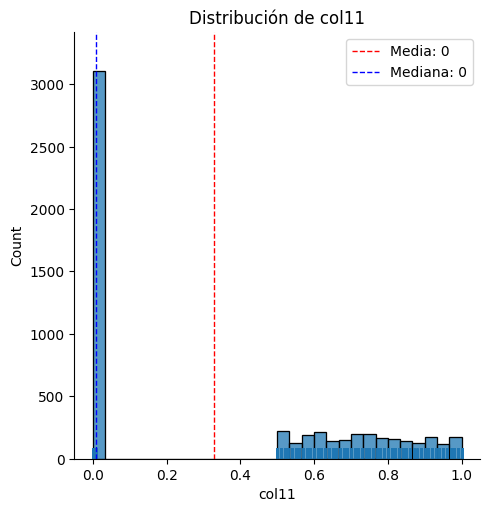

count    5597.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         1.0
max         1.0
Name: col11, dtype: float64
------------------------------------------------------------
------------------------------------------------------------
VARIABLE: col12



C:\Users\Mega Tecnologia\AppData\Local\Temp\ipykernel_20196\229618433.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data[columna], orient='h', palette='husl')


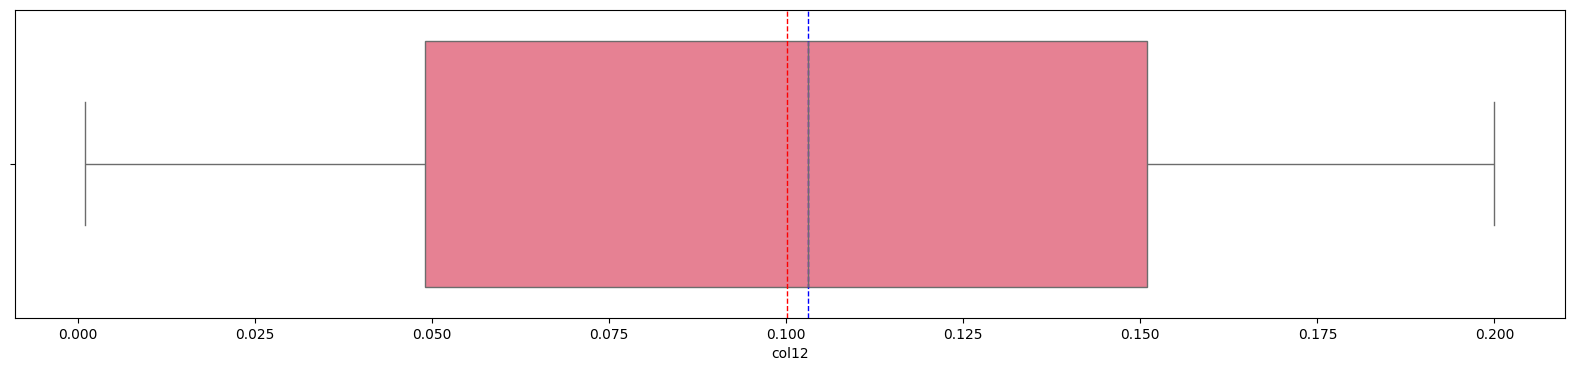

C:\Users\Mega Tecnologia\AppData\Local\Temp\ipykernel_20196\229618433.py:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(data[columna], rug = True, palette='husl' , bins = 30)


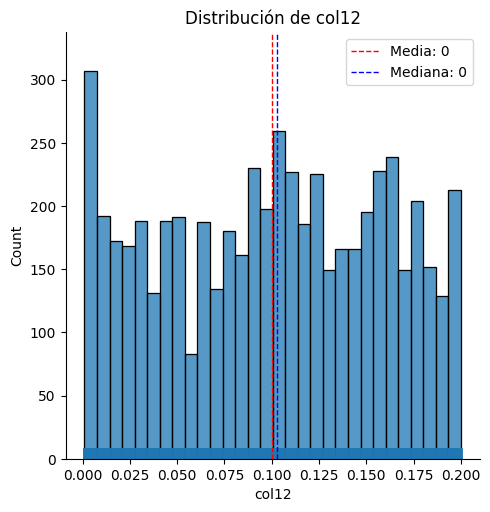

count    5597.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: col12, dtype: float64
------------------------------------------------------------
------------------------------------------------------------
VARIABLE: col13



C:\Users\Mega Tecnologia\AppData\Local\Temp\ipykernel_20196\229618433.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data[columna], orient='h', palette='husl')


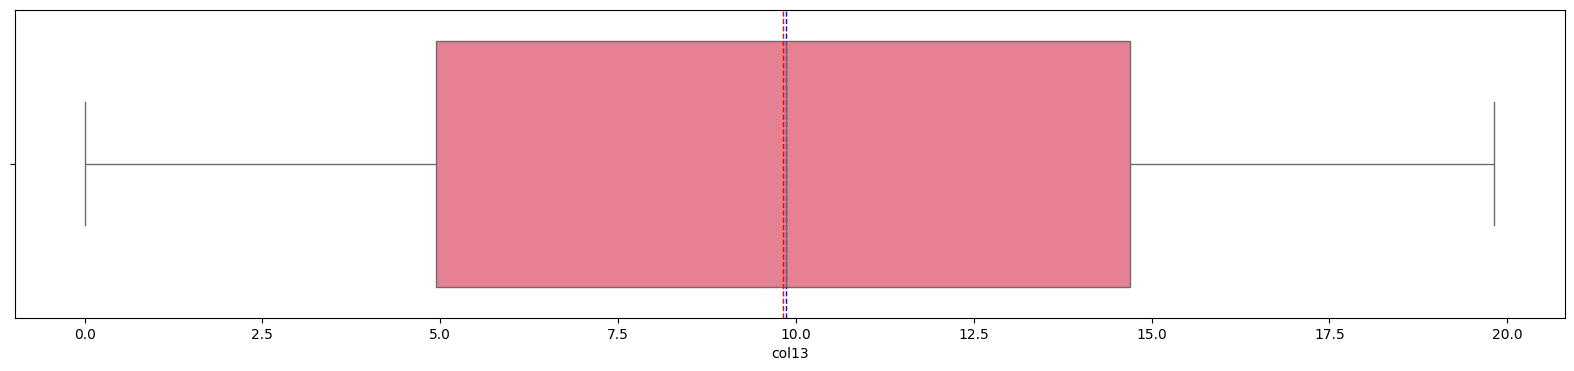

C:\Users\Mega Tecnologia\AppData\Local\Temp\ipykernel_20196\229618433.py:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(data[columna], rug = True, palette='husl' , bins = 30)


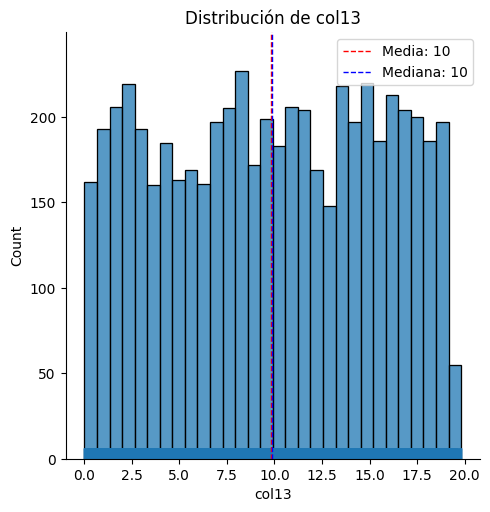

count    5597.0
mean       10.0
std         6.0
min         0.0
25%         5.0
50%        10.0
75%        15.0
max        20.0
Name: col13, dtype: float64
------------------------------------------------------------
------------------------------------------------------------
VARIABLE: col14



C:\Users\Mega Tecnologia\AppData\Local\Temp\ipykernel_20196\229618433.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data[columna], orient='h', palette='husl')


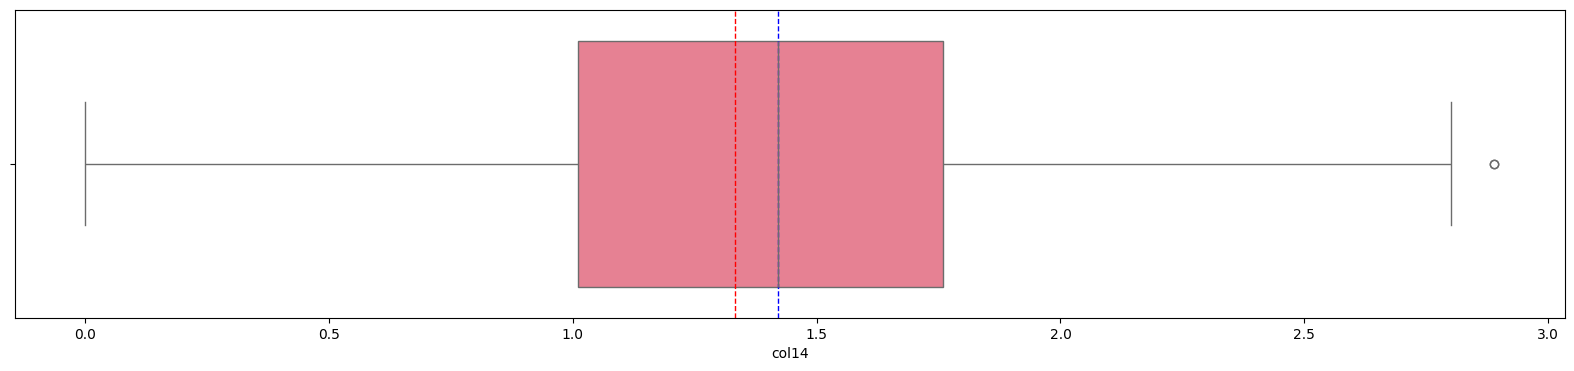

C:\Users\Mega Tecnologia\AppData\Local\Temp\ipykernel_20196\229618433.py:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(data[columna], rug = True, palette='husl' , bins = 30)


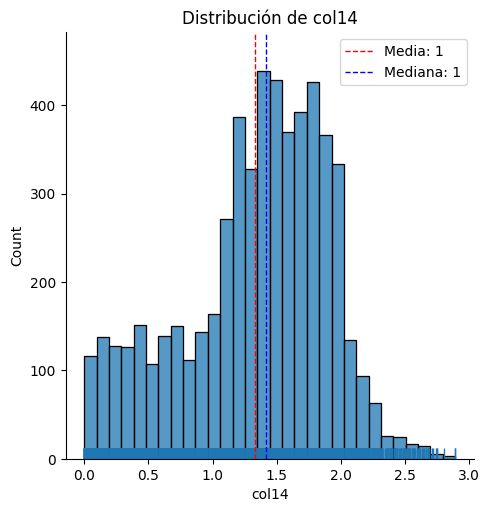

count    5597.0
mean        1.0
std         1.0
min         0.0
25%         1.0
50%         1.0
75%         2.0
max         3.0
Name: col14, dtype: float64
------------------------------------------------------------
------------------------------------------------------------
VARIABLE: col15



C:\Users\Mega Tecnologia\AppData\Local\Temp\ipykernel_20196\229618433.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data[columna], orient='h', palette='husl')


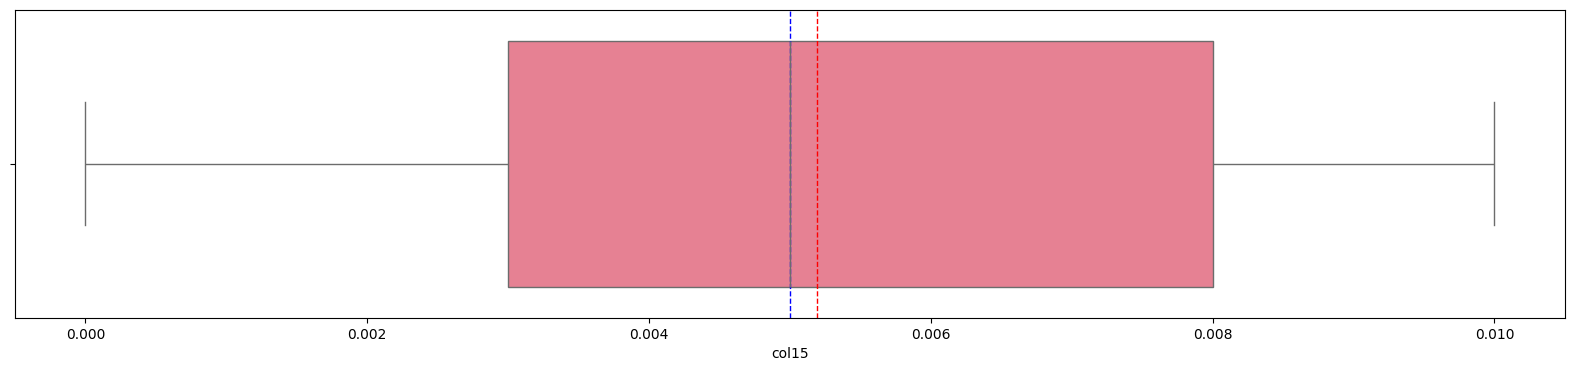

C:\Users\Mega Tecnologia\AppData\Local\Temp\ipykernel_20196\229618433.py:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(data[columna], rug = True, palette='husl' , bins = 30)


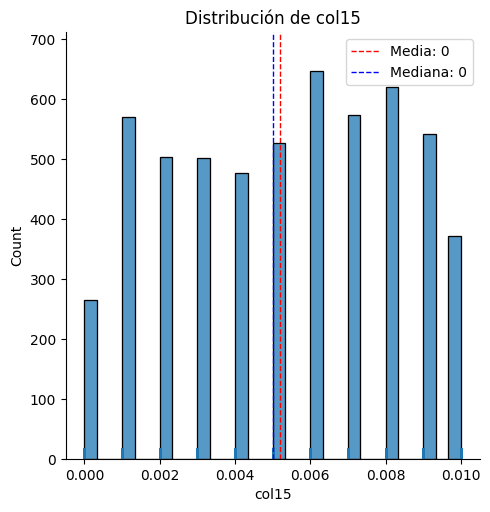

count    5597.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: col15, dtype: float64
------------------------------------------------------------
------------------------------------------------------------
VARIABLE: col16



C:\Users\Mega Tecnologia\AppData\Local\Temp\ipykernel_20196\229618433.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data[columna], orient='h', palette='husl')


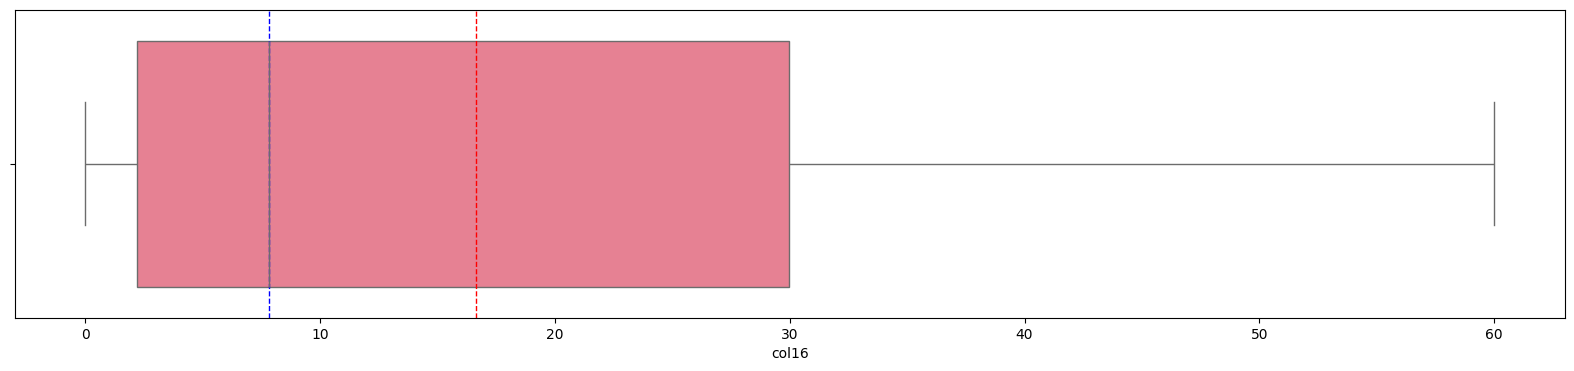

C:\Users\Mega Tecnologia\AppData\Local\Temp\ipykernel_20196\229618433.py:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(data[columna], rug = True, palette='husl' , bins = 30)


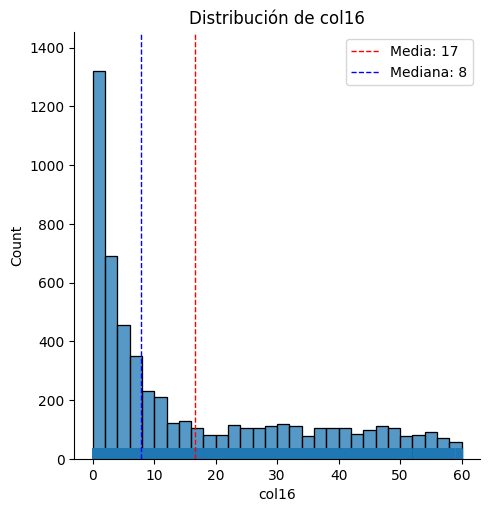

count    5597.0
mean       17.0
std        18.0
min         0.0
25%         2.0
50%         8.0
75%        30.0
max        60.0
Name: col16, dtype: float64
------------------------------------------------------------
------------------------------------------------------------
VARIABLE: col17



C:\Users\Mega Tecnologia\AppData\Local\Temp\ipykernel_20196\229618433.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data[columna], orient='h', palette='husl')


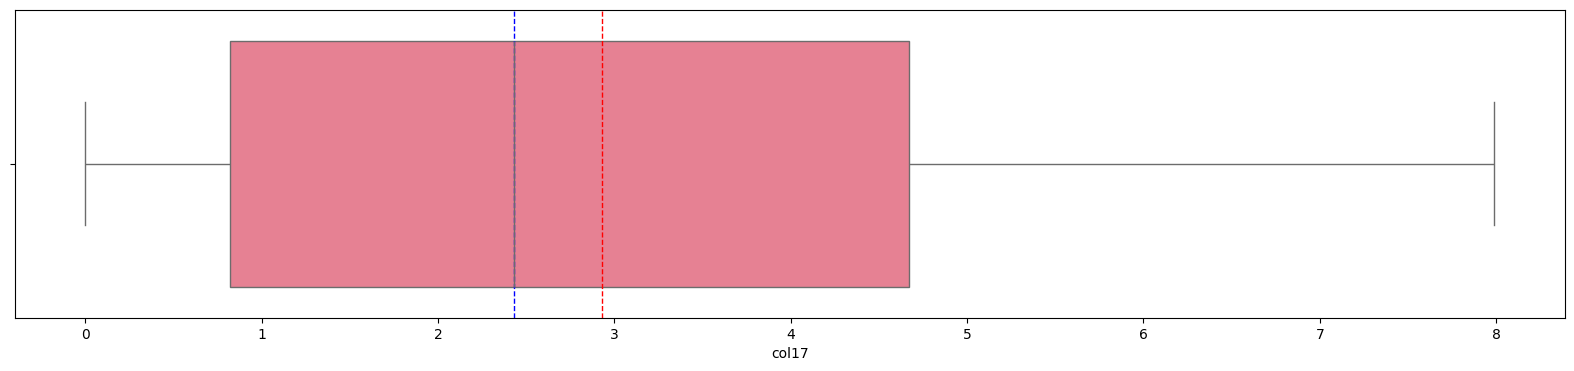

C:\Users\Mega Tecnologia\AppData\Local\Temp\ipykernel_20196\229618433.py:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(data[columna], rug = True, palette='husl' , bins = 30)


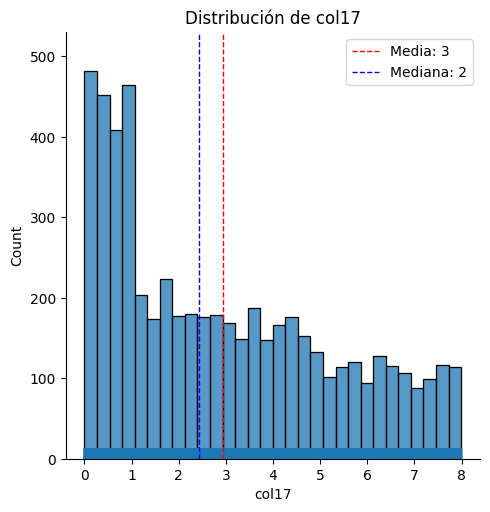

count    5597.0
mean        3.0
std         2.0
min         0.0
25%         1.0
50%         2.0
75%         5.0
max         8.0
Name: col17, dtype: float64
------------------------------------------------------------
------------------------------------------------------------
VARIABLE: col18



C:\Users\Mega Tecnologia\AppData\Local\Temp\ipykernel_20196\229618433.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data[columna], orient='h', palette='husl')


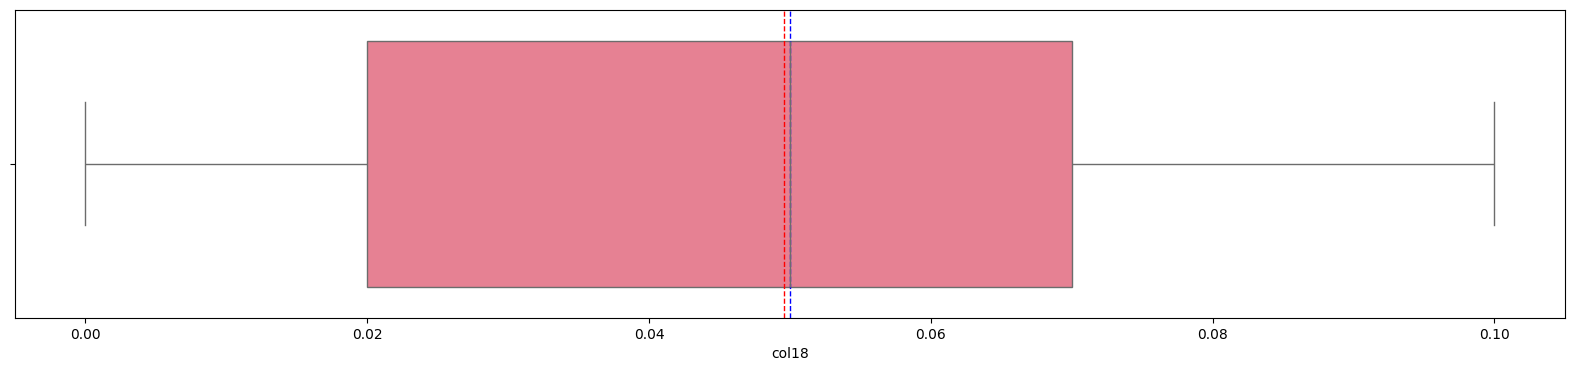

C:\Users\Mega Tecnologia\AppData\Local\Temp\ipykernel_20196\229618433.py:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(data[columna], rug = True, palette='husl' , bins = 30)


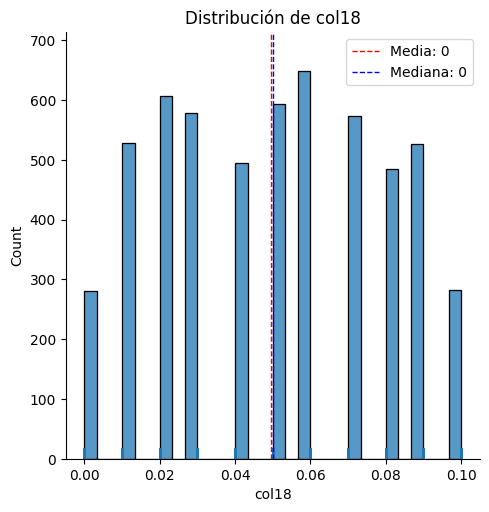

count    5597.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: col18, dtype: float64
------------------------------------------------------------
------------------------------------------------------------
VARIABLE: col19



C:\Users\Mega Tecnologia\AppData\Local\Temp\ipykernel_20196\229618433.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data[columna], orient='h', palette='husl')


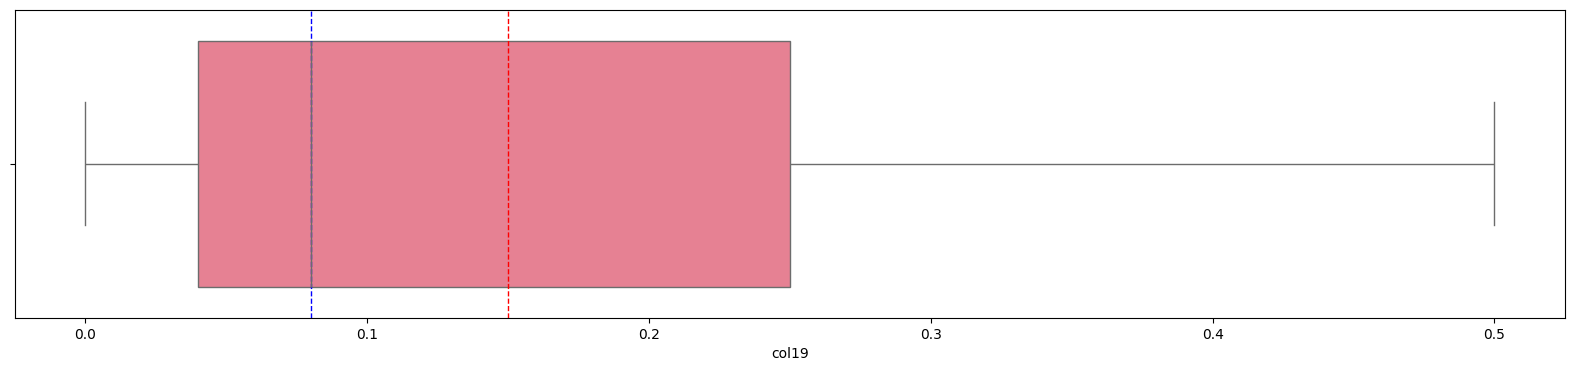

C:\Users\Mega Tecnologia\AppData\Local\Temp\ipykernel_20196\229618433.py:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(data[columna], rug = True, palette='husl' , bins = 30)


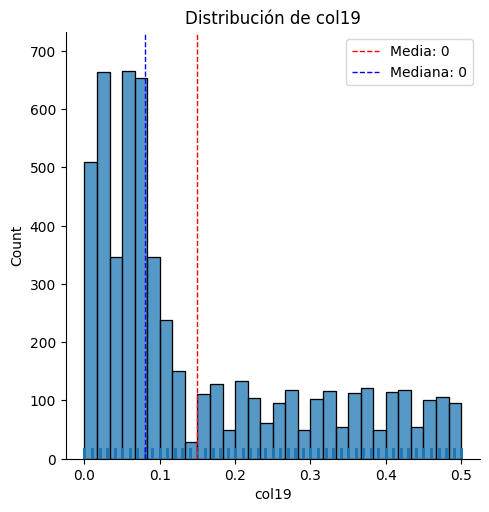

count    5597.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: col19, dtype: float64
------------------------------------------------------------
------------------------------------------------------------
VARIABLE: col20



C:\Users\Mega Tecnologia\AppData\Local\Temp\ipykernel_20196\229618433.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data[columna], orient='h', palette='husl')


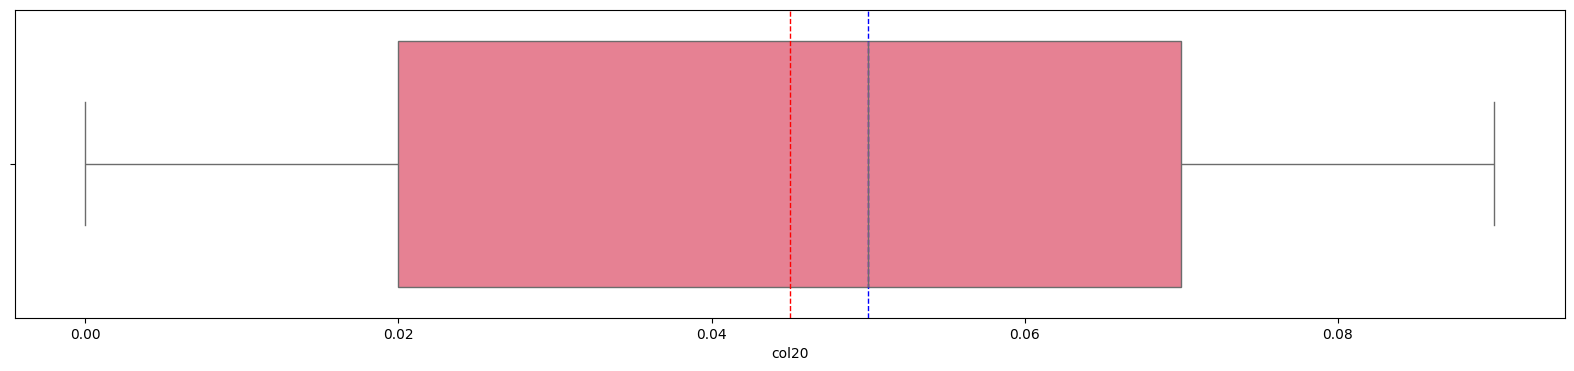

C:\Users\Mega Tecnologia\AppData\Local\Temp\ipykernel_20196\229618433.py:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(data[columna], rug = True, palette='husl' , bins = 30)


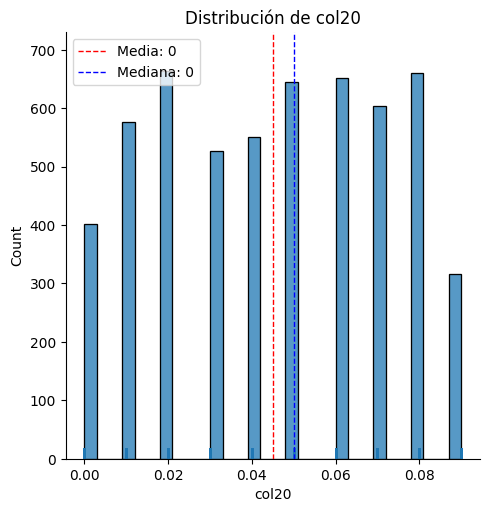

count    5597.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: col20, dtype: float64
------------------------------------------------------------
------------------------------------------------------------
VARIABLE: target



C:\Users\Mega Tecnologia\AppData\Local\Temp\ipykernel_20196\229618433.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data[columna], orient='h', palette='husl')


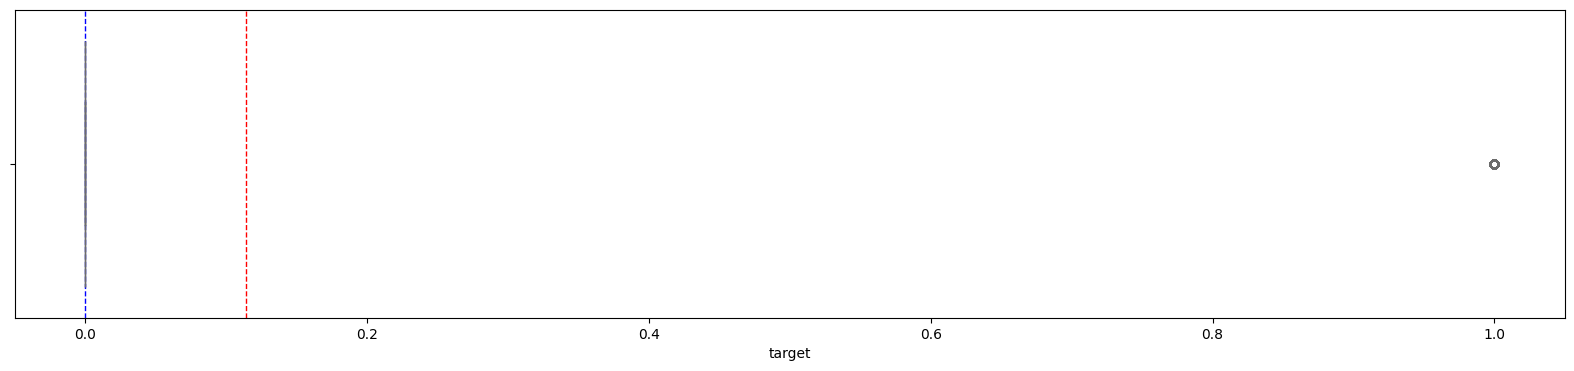

C:\Users\Mega Tecnologia\AppData\Local\Temp\ipykernel_20196\229618433.py:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(data[columna], rug = True, palette='husl' , bins = 30)


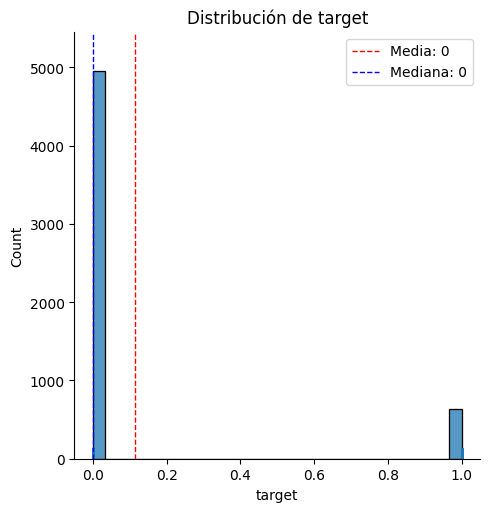

count    5597.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         1.0
Name: target, dtype: float64
------------------------------------------------------------


In [272]:
graficos_variables_cuant(train)

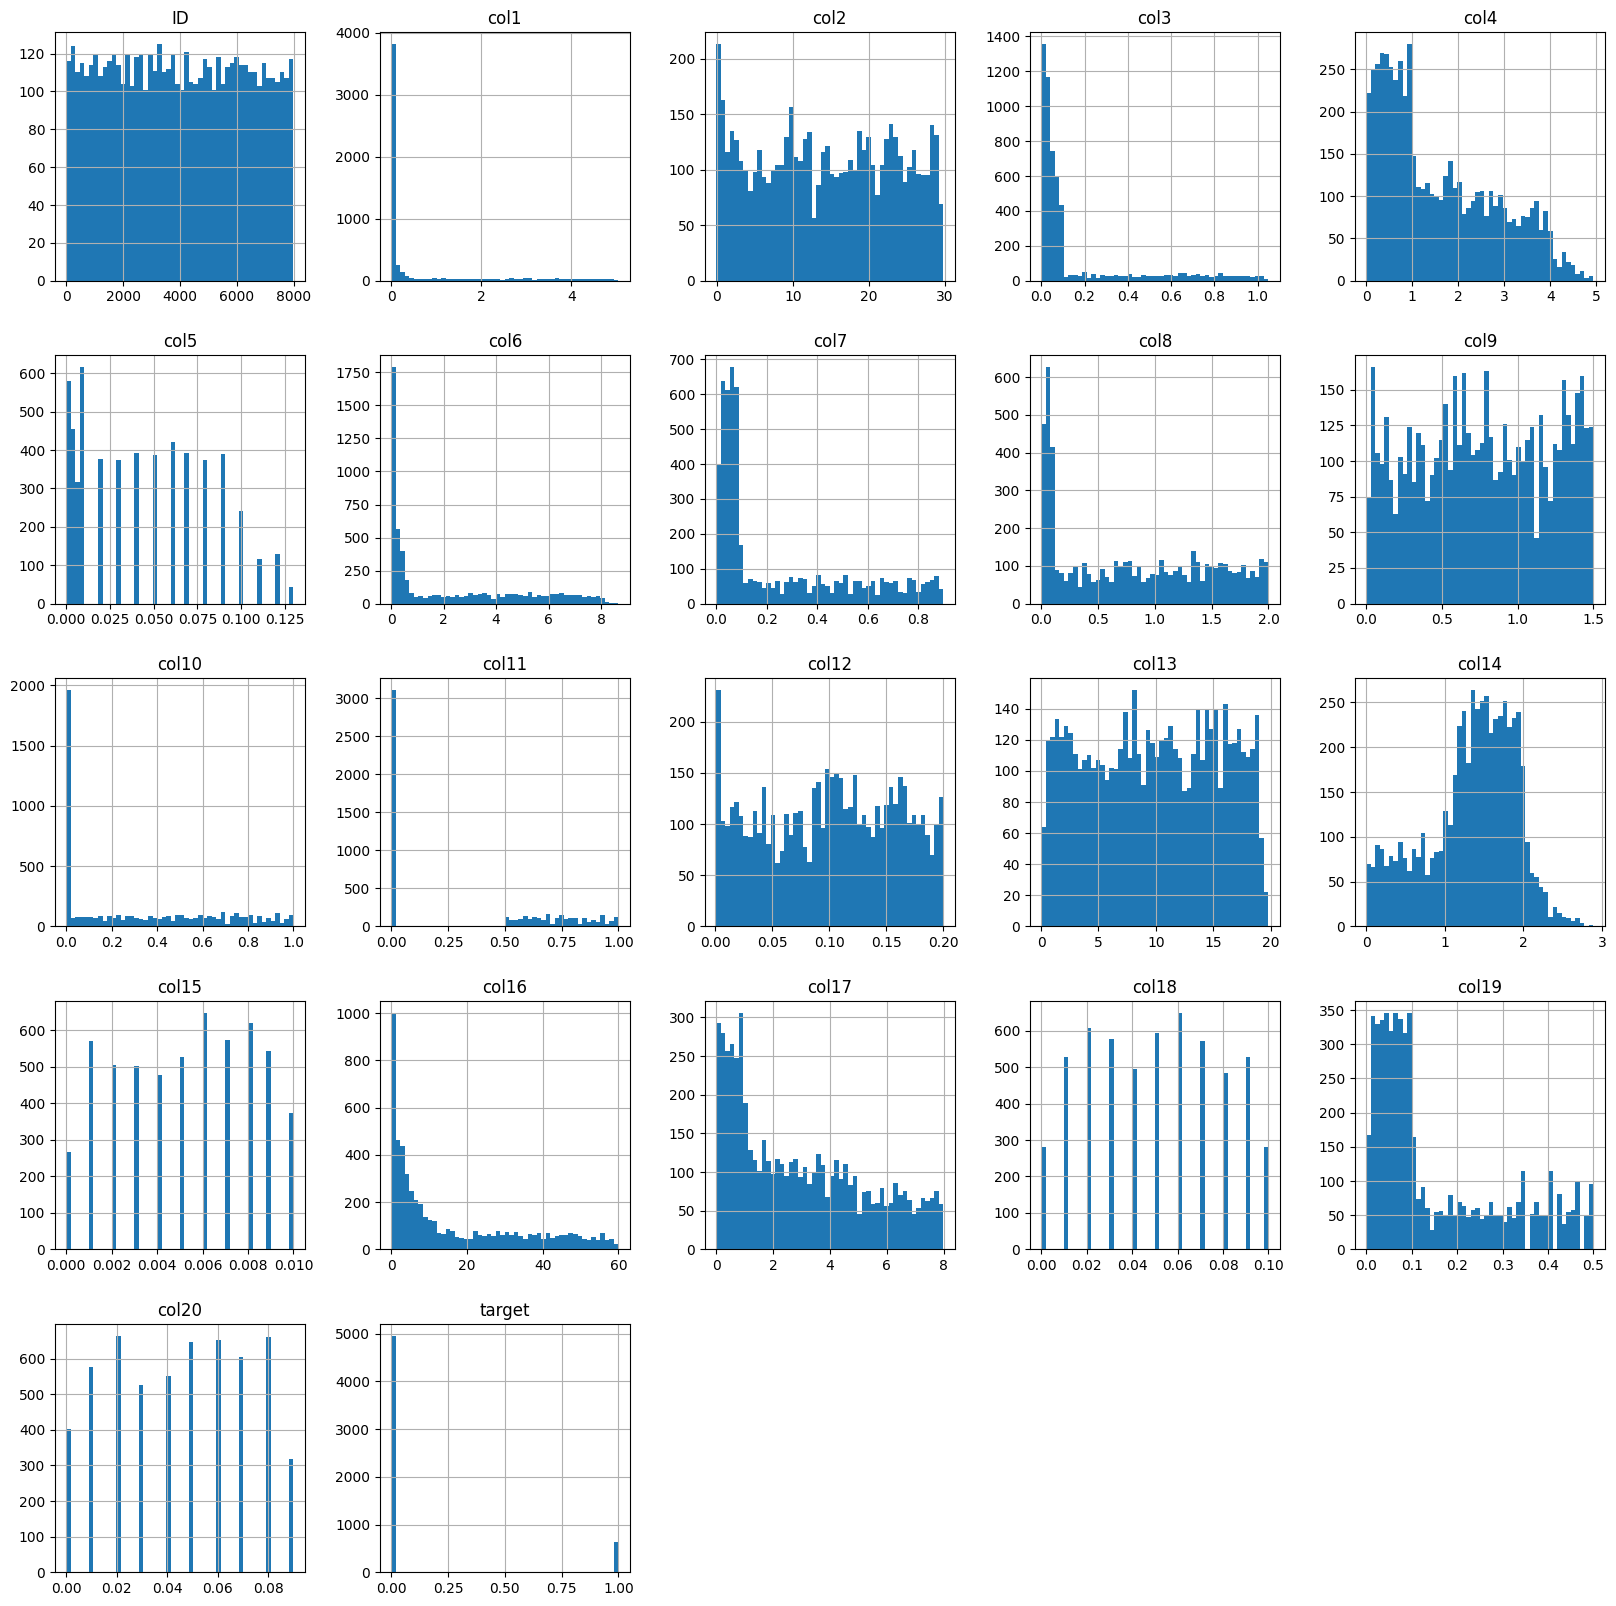

In [273]:
train.hist(bins=50, figsize=(20,20))
plt.show()

## Como es la target

In [274]:
train['target'].value_counts()

target
0    4957
1     640
Name: count, dtype: int64

La target esta desbalanceada por lo que vamos a tener que balancearla para poder mejorar la predicción

## Correlaciones entre variables

In [275]:
train.corr()[['target']]

,target
ID,-0.416405
col1,0.358168
col2,-0.017318
col3,-0.132675
col4,0.104875
col5,-0.271454
col6,0.198555
col7,0.174420
col8,0.031497
col9,0.003556


## Conclusiones

- Vemos que las columnas 1,3,6,7,10,16,19 tiene un sesgo hacia la izquierda por lo que lo vamos a tratar a ver si mejora la predicción
- Las columnas 2 y 16 tienen medidas mucho más altas que las otras columnas
- La target esta desbalanceada
- La columna target tiene más correlación con las columnas 1,3,4,5,6,7,9

## Dvisión de datos

In [276]:
X = train.drop(columns=['ID', 'col2', 'col8',
        'col10', 'col11', 'col12', 'col13', 'col14', 'col15', 'col16',
       'col17', 'col18', 'col19', 'col20', 'target'], axis=1)
y = train['target']

In [277]:
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size = 0.20, random_state = 33)

Vemos la distribución de las variables

array([[<AxesSubplot: title={'center': 'col1'}>,
        <AxesSubplot: title={'center': 'col3'}>,
        <AxesSubplot: title={'center': 'col4'}>],
       [<AxesSubplot: title={'center': 'col5'}>,
        <AxesSubplot: title={'center': 'col6'}>,
        <AxesSubplot: title={'center': 'col7'}>],
       [<AxesSubplot: title={'center': 'col9'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

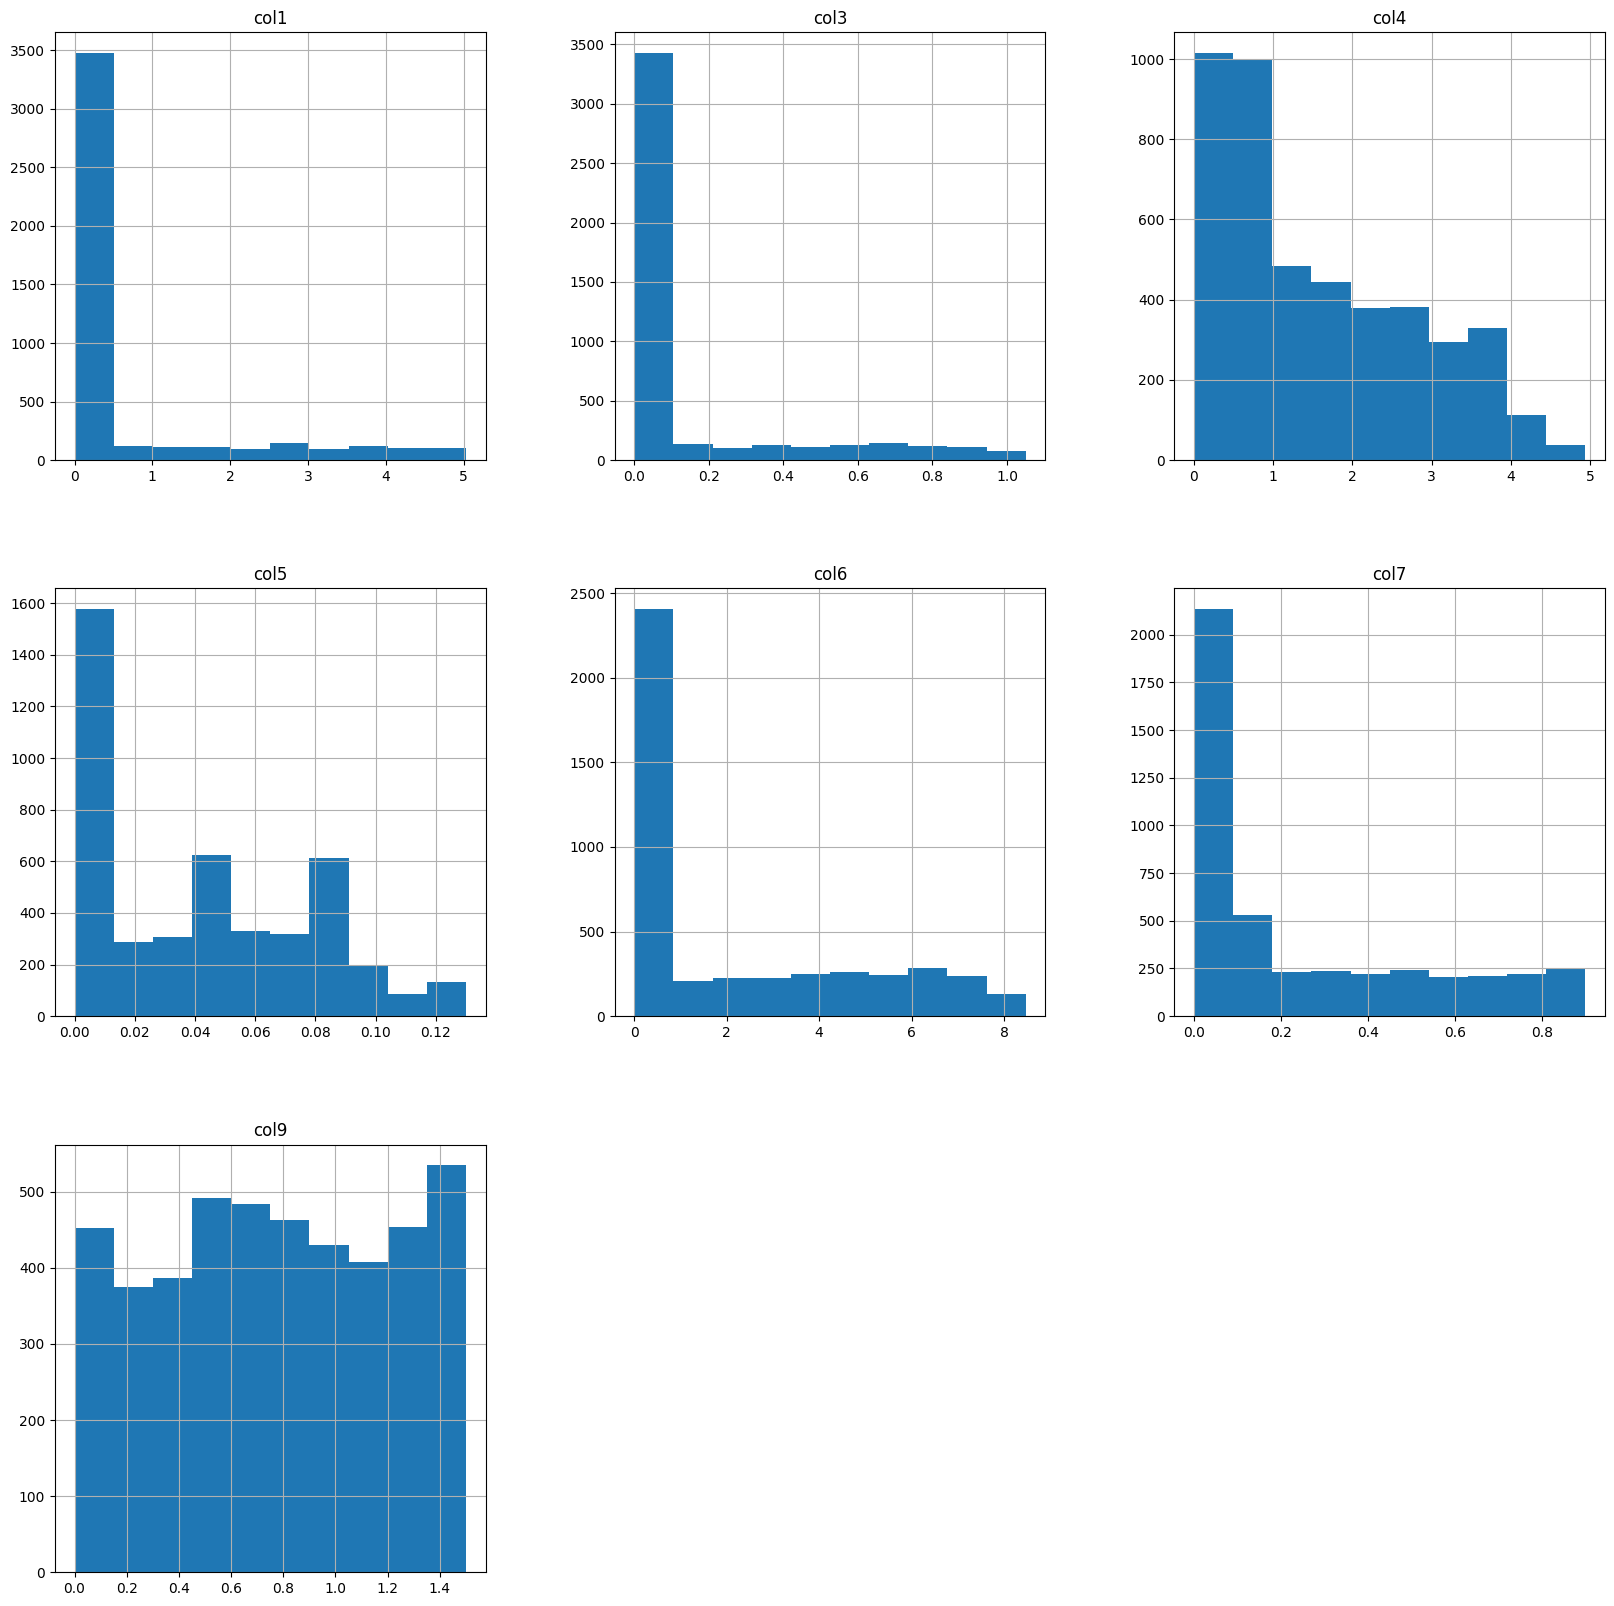

In [278]:
X_train.hist(figsize=(20,20))

## Aplicamos log para normalizar las columnas que tiene sesgo hacia la izq

Vemos si mejora sino probamos sin aplicarlo

X_train

In [279]:
# columnas = ['col1', 'col3', 'col5', 'col6', 'col7']

# for i in columnas:
#     X_train[i] = np.log(X_train[i] + 1)

X_validation

In [280]:
# columnas = ['col1', 'col3', 'col5', 'col6', 'col7']

# for i in columnas:
#     X_validation[i] = np.log(X_validation[i] + 1)

La predicción no mejora no aplicando el log

## Balanceamos las clases

Solo se hace en el train para que el modelo aprenda mejor

Haciendo un SMOTE o un Oversamplig no mejora la predicción de la clase minoritaria

In [281]:
# smote = SMOTE(random_state = 40, k_neighbors=6)
# X_train, y_train = smote.fit_resample(X_train, y_train)

In [282]:
# oversampler = RandomOverSampler(random_state=42)
# X_train, y_train = oversampler.fit_resample(X_train, y_train)

In [283]:
y_train.value_counts()

target
0    3962
1     515
Name: count, dtype: int64

In [242]:
undersampler = RandomUnderSampler(random_state=42)

X_train, y_train = undersampler.fit_resample(X_train, y_train)

In [243]:
y_train.value_counts()

target
0    515
1    515
Name: count, dtype: int64

Probamos con otra forma de balancear

In [284]:
smote_enn = SMOTEENN(random_state=42)

X_resampled, y_resampled = smote_enn.fit_resample(X, y)

In [285]:
y_resampled.value_counts()

target
1    4550
0    3335
Name: count, dtype: int64

## Modelos

In [244]:
model_0 = SVC(random_state=40)
model_1 = LogisticRegression(random_state=40)
model_2 = RandomForestClassifier(class_weight='balanced', random_state=40)
model_3 = XGBClassifier(random_state=40)
model_4 = CatBoostClassifier( random_state=40)

In [245]:
models = [model_0, model_1, model_2, model_3, model_4]

In [247]:
dicc = {}
for i in models:
    scores = cross_val_score(i, X_train, y_train, cv=10, scoring='balanced_accuracy')
    media = scores.mean()
    estandar = scores.std()
    clave = f"{type(i).__name__}- 'balanced_accuracy' "

    dicc[clave] = media

df_scores = pd.DataFrame([dicc]).T.sort_values(by=0, ascending=False)
df_scores

Learning rate set to 0.009974
0:	learn: 0.6860781	total: 2.08ms	remaining: 2.08s
1:	learn: 0.6791436	total: 3.94ms	remaining: 1.96s
2:	learn: 0.6724847	total: 5.78ms	remaining: 1.92s
3:	learn: 0.6655424	total: 7.54ms	remaining: 1.88s
4:	learn: 0.6593967	total: 9.36ms	remaining: 1.86s
5:	learn: 0.6527149	total: 11.1ms	remaining: 1.84s
6:	learn: 0.6467605	total: 12.9ms	remaining: 1.84s
7:	learn: 0.6405903	total: 14.8ms	remaining: 1.83s
8:	learn: 0.6346877	total: 16.6ms	remaining: 1.83s
9:	learn: 0.6290463	total: 18.4ms	remaining: 1.82s
10:	learn: 0.6234075	total: 20.2ms	remaining: 1.81s
11:	learn: 0.6179627	total: 22ms	remaining: 1.81s
12:	learn: 0.6126024	total: 23.8ms	remaining: 1.8s
13:	learn: 0.6075016	total: 25.6ms	remaining: 1.8s
14:	learn: 0.6020443	total: 27.5ms	remaining: 1.8s
15:	learn: 0.5970907	total: 29.3ms	remaining: 1.8s
16:	learn: 0.5921016	total: 31.3ms	remaining: 1.81s
17:	learn: 0.5879511	total: 33ms	remaining: 1.8s
18:	learn: 0.5830954	total: 34.7ms	remaining: 1.79s
1

,0
<catboost.core.CatBoostClassifier object at 0x0000024AA72645E0>- 'balanced_accuracy',0.842590
"RandomForestClassifier(class_weight='balanced', random_state=40)- 'balanced_accuracy'",0.840686
"XGBClassifier(base_score=None, booster=None, callbacks=None,\n colsample_bylevel=None, colsample_bynode=None,\n colsample_bytree=None, device=None, early_stopping_rounds=None,\n enable_categorical=False, eval_metric=None, feature_types=None,\n gamma=None, grow_policy=None, importance_type=None,\n interaction_constraints=None, learning_rate=None, max_bin=None,\n max_cat_threshold=None, max_cat_to_onehot=None,\n max_delta_step=None, max_depth=None, max_leaves=None,\n min_child_weight=None, missing=nan, monotone_constraints=None,\n multi_strategy=None, n_estimators=None, n_jobs=None,\n num_parallel_tree=None, random_state=40, ...)- 'balanced_accuracy'",0.817327
SVC(random_state=40)- 'balanced_accuracy',0.789235
LogisticRegression(random_state=40)- 'balanced_accuracy',0.785256


In [248]:
models_1 = [model_4, model_3, model_2]

In [249]:
lista_params = []
for i in models_1:
    if type(i).__name__ == 'CatBoostClassifier':
        param_grid = {
            'learning_rate': [0.01, 0.05, 0.1],
            'depth': [4, 6, 8],
            'l2_leaf_reg': [1, 3, 5]
        }
    elif type(i).__name__ == 'XGBClassifier':
        param_grid = {
            'learning_rate': [0.01, 0.05, 0.1],
            'max_depth': [3, 6, 9],
            'min_child_weight': [1, 3, 5],
            'gamma': [0, 0.1, 0.3]
        }
    else:
        param_grid = {
            'n_estimators': [100, 200],
            'max_depth': [2, 5, 10],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }

    grid_search = GridSearchCV(i,
                            param_grid,
                            cv=5,
                            scoring='neg_mean_squared_error',
                            n_jobs=-1
                            )

    grid_search.fit(X_train, y_train)
    lista_params.append(grid_search.best_params_)

lista_params

0:	learn: 0.6860242	total: 1.63ms	remaining: 1.62s
1:	learn: 0.6798733	total: 2.88ms	remaining: 1.44s
2:	learn: 0.6734942	total: 4.09ms	remaining: 1.36s
3:	learn: 0.6669769	total: 5.31ms	remaining: 1.32s
4:	learn: 0.6605846	total: 6.54ms	remaining: 1.3s
5:	learn: 0.6543240	total: 7.74ms	remaining: 1.28s
6:	learn: 0.6489101	total: 8.91ms	remaining: 1.26s
7:	learn: 0.6430763	total: 10.1ms	remaining: 1.25s
8:	learn: 0.6370827	total: 11.3ms	remaining: 1.24s
9:	learn: 0.6312580	total: 12.5ms	remaining: 1.24s
10:	learn: 0.6256470	total: 13.7ms	remaining: 1.23s
11:	learn: 0.6205265	total: 14.9ms	remaining: 1.22s
12:	learn: 0.6148947	total: 16.1ms	remaining: 1.22s
13:	learn: 0.6094889	total: 17.2ms	remaining: 1.21s
14:	learn: 0.6043771	total: 18.4ms	remaining: 1.21s
15:	learn: 0.5998711	total: 19.8ms	remaining: 1.22s
16:	learn: 0.5949279	total: 21ms	remaining: 1.22s
17:	learn: 0.5904606	total: 22.2ms	remaining: 1.21s
18:	learn: 0.5863256	total: 23.4ms	remaining: 1.21s
19:	learn: 0.5825061	tota

[{'depth': 4, 'l2_leaf_reg': 5, 'learning_rate': 0.01},
 {'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1},
 {'max_depth': 5,
  'min_samples_leaf': 1,
  'min_samples_split': 5,
  'n_estimators': 100}]

In [250]:
model_22 = RandomForestClassifier(class_weight='balanced', random_state=40)
model_33 = XGBClassifier(gamma = 0.1, learning_rate = 0.1, max_depth = 3, min_child_weight= 1, random_state=40)
model_44 = CatBoostClassifier( depth=4, l2_leaf_reg=5, learning_rate=0.01 ,random_state=40)
model_55 = voting_clf = VotingClassifier(
    estimators=[
        ('rfc', model_22),
        ('xgb', model_33),
        ('cb', model_44)
    ],voting='soft'
)

In [251]:
models_2 = [model_22, model_33, model_44, model_55]

In [252]:
dicc = {}
for i in models_2:
    scores = cross_val_score(i, X_train, y_train, cv=10, scoring='balanced_accuracy')
    media = scores.mean()
    estandar = scores.std()
    clave = f"{type(i).__name__}- 'balanced_accuracy' "

    dicc[clave] = media

df_scores = pd.DataFrame([dicc]).T.sort_values(by=0, ascending=False)
df_scores

0:	learn: 0.6864211	total: 1.51ms	remaining: 1.51s
1:	learn: 0.6802969	total: 2.76ms	remaining: 1.38s
2:	learn: 0.6740679	total: 4.07ms	remaining: 1.35s
3:	learn: 0.6676588	total: 5.37ms	remaining: 1.34s
4:	learn: 0.6611699	total: 6.67ms	remaining: 1.33s
5:	learn: 0.6548216	total: 7.93ms	remaining: 1.31s
6:	learn: 0.6495303	total: 9.22ms	remaining: 1.31s
7:	learn: 0.6437442	total: 10.5ms	remaining: 1.3s
8:	learn: 0.6376089	total: 11.8ms	remaining: 1.3s
9:	learn: 0.6319703	total: 13.1ms	remaining: 1.3s
10:	learn: 0.6263807	total: 14.4ms	remaining: 1.29s
11:	learn: 0.6205931	total: 15.6ms	remaining: 1.28s
12:	learn: 0.6153358	total: 16.9ms	remaining: 1.28s
13:	learn: 0.6100361	total: 18.2ms	remaining: 1.28s
14:	learn: 0.6051661	total: 19.4ms	remaining: 1.28s
15:	learn: 0.6004874	total: 20.7ms	remaining: 1.27s
16:	learn: 0.5956614	total: 22ms	remaining: 1.27s
17:	learn: 0.5912517	total: 23.3ms	remaining: 1.27s
18:	learn: 0.5871999	total: 24.6ms	remaining: 1.27s
19:	learn: 0.5834522	total:

,0
CatBoostClassifier- 'balanced_accuracy',0.844570
VotingClassifier- 'balanced_accuracy',0.843571
RandomForestClassifier- 'balanced_accuracy',0.840686
XGBClassifier- 'balanced_accuracy',0.837689


In [254]:
model = model_44.fit(X_train, y_train)

0:	learn: 0.6860242	total: 1.89ms	remaining: 1.89s
1:	learn: 0.6798733	total: 3.74ms	remaining: 1.86s
2:	learn: 0.6734942	total: 5.32ms	remaining: 1.77s
3:	learn: 0.6669769	total: 6.83ms	remaining: 1.7s
4:	learn: 0.6605846	total: 8.29ms	remaining: 1.65s
5:	learn: 0.6543240	total: 9.73ms	remaining: 1.61s
6:	learn: 0.6489101	total: 11.2ms	remaining: 1.59s
7:	learn: 0.6430763	total: 12.7ms	remaining: 1.57s
8:	learn: 0.6370827	total: 14.1ms	remaining: 1.55s
9:	learn: 0.6312580	total: 15.7ms	remaining: 1.55s
10:	learn: 0.6256470	total: 17.2ms	remaining: 1.54s
11:	learn: 0.6205265	total: 18.7ms	remaining: 1.54s
12:	learn: 0.6148947	total: 20.2ms	remaining: 1.53s
13:	learn: 0.6094889	total: 23.3ms	remaining: 1.64s
14:	learn: 0.6043771	total: 26.3ms	remaining: 1.73s
15:	learn: 0.5998711	total: 28.2ms	remaining: 1.74s
16:	learn: 0.5949279	total: 29.8ms	remaining: 1.72s
17:	learn: 0.5904606	total: 31.2ms	remaining: 1.7s
18:	learn: 0.5863256	total: 32.5ms	remaining: 1.68s
19:	learn: 0.5825061	tot

## Balanceo haciendo Under Sampling

In [255]:
y_pred = model.predict(X_validation)
print(f"Modelo {model} : {balanced_accuracy_score(y_validation, y_pred)}")
print(classification_report(y_validation, y_pred))

Modelo <catboost.core.CatBoostClassifier object at 0x0000024AA86835B0> : 0.8002211055276383
              precision    recall  f1-score   support

           0       0.96      0.89      0.92       995
           1       0.45      0.71      0.55       125

    accuracy                           0.87      1120
   macro avg       0.70      0.80      0.74      1120
weighted avg       0.90      0.87      0.88      1120



Predicción antes de hacer el under_sampling - con modelo de balanceo Over sampling

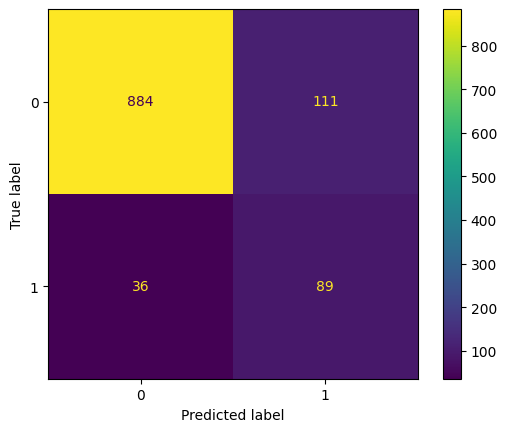

In [256]:
ConfusionMatrixDisplay(confusion_matrix(y_validation,y_pred)).plot()

## Balanceo con SMOTEENN, no se modifican los hiperparametros

In [286]:
model_1 = model_44.fit(X_resampled, y_resampled)

0:	learn: 0.6828147	total: 3.01ms	remaining: 3.01s
1:	learn: 0.6733840	total: 5.61ms	remaining: 2.8s
2:	learn: 0.6638882	total: 8.23ms	remaining: 2.74s
3:	learn: 0.6546391	total: 10.8ms	remaining: 2.69s
4:	learn: 0.6452295	total: 13.4ms	remaining: 2.67s
5:	learn: 0.6365564	total: 16ms	remaining: 2.65s
6:	learn: 0.6281411	total: 18.5ms	remaining: 2.62s
7:	learn: 0.6196393	total: 20.9ms	remaining: 2.59s
8:	learn: 0.6115365	total: 23.8ms	remaining: 2.62s
9:	learn: 0.6034338	total: 26.4ms	remaining: 2.62s
10:	learn: 0.5967443	total: 29.1ms	remaining: 2.61s
11:	learn: 0.5886734	total: 31.6ms	remaining: 2.6s
12:	learn: 0.5817402	total: 34.1ms	remaining: 2.59s
13:	learn: 0.5750514	total: 36.6ms	remaining: 2.58s
14:	learn: 0.5677991	total: 39.2ms	remaining: 2.58s
15:	learn: 0.5612058	total: 42.6ms	remaining: 2.62s
16:	learn: 0.5551956	total: 45.9ms	remaining: 2.65s
17:	learn: 0.5492074	total: 49.6ms	remaining: 2.71s
18:	learn: 0.5432567	total: 52.5ms	remaining: 2.71s
19:	learn: 0.5374071	total

In [292]:
y_pred_1 = model_1.predict(X_validation)
print(f"Modelo {model_1} : {balanced_accuracy_score(y_validation, y_pred_1)}")
print(classification_report(y_validation, y_pred_1))

Modelo <catboost.core.CatBoostClassifier object at 0x0000024AA86835B0> : 0.8096482412060302
              precision    recall  f1-score   support

           0       0.97      0.86      0.91       995
           1       0.40      0.76      0.53       125

    accuracy                           0.85      1120
   macro avg       0.69      0.81      0.72      1120
weighted avg       0.90      0.85      0.87      1120



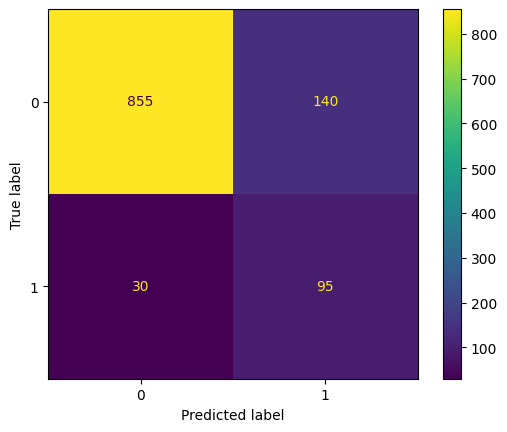

In [293]:
ConfusionMatrixDisplay(confusion_matrix(y_validation,y_pred_1)).plot()

El recall balancenando con SMOTE solo es de 0.63 - con UnderSamplig 0.71 - SMOTEENN 0.76

## Clonclusión 

El mejor método de balanceo es el último elegido por lo que se propone mejorar los hiper parametros para adaptarlos a los datos obtenidos después de dicho balanceo, para así mejorar ese predicción. Aunque el acurracy en general baja aplicando distintos metodos de balanceo se prioriza la predicción correcto de la clase minoritaria

In [294]:
test = pd.read_csv("data/test.csv")

In [295]:
test

,ID,col1,col2,col3,col4,col5,col6,col7,col8,col9,...,col11,col12,col13,col14,col15,col16,col17,col18,col19,col20
0,2816,0.06,25.18,0.04,0.04,0.001,5.10,0.86,1.23,0.52,...,0.620,0.022,12.63,1.93,0.003,1.19,7.79,0.04,0.43,0.01
1,3641,0.09,27.51,0.63,2.05,0.110,6.81,0.83,0.09,1.21,...,0.730,0.001,4.49,1.95,0.009,52.30,1.00,0.10,0.12,0.01
2,7191,0.09,1.10,0.07,0.73,0.050,0.10,0.01,1.44,1.42,...,0.007,0.177,1.03,1.27,0.002,7.04,0.38,0.06,0.05,0.06
3,5199,0.07,11.23,0.04,1.22,0.030,0.16,0.03,1.18,0.88,...,0.001,0.032,4.07,0.98,0.003,1.28,0.51,0.06,0.03,0.07
4,7994,0.01,10.00,0.01,2.00,0.000,2.00,0.00,0.09,0.00,...,0.000,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2394,7300,0.06,0.60,0.02,0.46,0.090,0.20,0.08,0.70,0.57,...,0.005,0.065,16.31,2.12,0.008,2.73,3.53,0.03,0.07,0.03
2395,1327,2.99,11.76,0.64,2.71,0.010,2.36,0.57,1.81,0.38,...,0.006,0.083,7.72,1.67,0.007,12.99,6.11,0.05,0.24,0.00
2396,4739,0.08,10.53,0.09,2.97,0.010,0.65,0.05,0.04,1.38,...,0.005,0.033,7.43,0.62,0.007,4.49,0.50,0.09,0.05,0.02
2397,2611,0.08,9.74,0.01,0.22,0.001,4.50,0.66,0.01,0.56,...,0.002,0.185,15.38,1.24,0.003,43.87,3.36,0.05,0.04,0.08


In [296]:
X_test = test.drop(columns=['ID', 'col2', 'col8',
        'col10', 'col11', 'col12', 'col13', 'col14', 'col15', 'col16',
       'col17', 'col18', 'col19', 'col20'], axis=1)

In [297]:
# columnas = ['col1', 'col3', 'col5', 'col6', 'col7']

# for i in columnas:
#     X_test[i] = np.log(X_test[i] + 1)

In [298]:
y_pred = model_1.predict(X_test)

In [299]:
y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [300]:
pd.DataFrame(y_pred).value_counts()

0    1909
1     490
Name: count, dtype: int64